# 아파트 실거래가 예측
알고리즘 | 정형 | 회귀 | 금융 | RMSE

## 대회 개요


1. 배경
안녕하세요 여러분!🙌 아파트 실거래가 예측에 오신 것을 환영합니다.



통계청 2015년 자료에 의하면 (https://bit.ly/2SFyzMA)

일반적인 한국인의 절반은 48.1%는 아파트에 살고 있습니다.

그들은 아파트 주거 선호도가 매우 높습니다.

또한 부의 증식 수단으로 생각 하기 때문에 아파트 가격에 관심이 많습니다.

	

이번 대회의 데이터 제공자는 직방입니다.

직방은 부동산 정보의 비대칭성과 불투명성을 해소하기 위해 노력하며,

중개사와 구매자를 연결하여 부동산정보 서비스 시장의 신뢰도를 높이는데 기여합니다.



최근 매물 가격 정보는 직방, 다음부동산, 네이버부동산에서 볼 수 있습니다.

하지만 최근 매물 가격은 아직 거래되지 않아 정확하지 않은 정보일 수 있습니다.



이에따라, 본 대회는 실 거래가와 아파트, 학교, 지하철역 정보를 제공하며,

아파트 구매자들의 비대칭성 정보를 해결하기 위해 미래의 실 거래가 예측을 목표로 합니다.





2. 목적


서울/부산 지역 아파트 실 거래가를 예측하는 모델 개발





3. 후원 / 주관
후원 : ZPER
주관: 데이콘




4. 유의사항


참가자 당 하나의 계정

복수의 계정으로 데이콘 사이트에 가입 할 수 없으므로 여러 계정에서 제출할 수 없습니다.

팀 외부의 개인 공유 없음

팀 외부에서 개인적으로 코드 또는 데이터를 공유하는 것은 허용되지 않습니다. 데이콘 커뮤니티 모든 참가자가 사용할 수 있도록 코드를 공유하는 것은 괜찮습니다.

## 🎉 데이터톤 채점기준

1. **EDA 및 시각화**가 적절하게 이루어졌는가? (30%)
    1. EDA 및 시각화를 진행했는가?
    2. 데이터 특성에 따른 다양한 시각화 자료를 만들었는가?
    3. 시각화 자료를 통한 새로운 인사이트를 도출했는가?
2. **머신러닝을 이용한 예측**이 이루어졌는가? (30%)
    1. 추론 과정을 위한 적절한 전처리가 진행되었는가?
    2. 머신러닝을 이용한 예측을 진행했는가?
    3. 스코어를 향상시키기 위한 여러가지 시도를 진행했는가?
3. **팀원들과의 협업**이 잘 이루어졌는가? (30 %)
    1. 팀원들 간의 소통이 잘 이루어졌는가?
    2. 팀원 모두 적절한 역할을 수행했는가?
4. **발표**가 **매끄럽게 진행**되었고, **발표 시간을 준수**하였는가? (10%)

# 해보자 EDA

제공되어진 데이터셋을 확인해보고, 라벨값인 실거래가를 예측하는데 도움을 줄 수 있는 데이터는 무엇이고 전처리는 어떻게 해야할 지 다양하게 시도한다.

## Dataset 

### train.csv (12 features)

- apartment_id, 아파트 아이디
- city, 도시(시)
- dong, 동
- jibun, 주소
- apt, 단지 이름
- addr_kr, 주소 ( 동 + 주소 + 단지이름 )
- exclusive_use_area, 전용면적
- year_of_completion, 설립일자
- transaction_year_month, 거래년월
- transaction_date, 거래날짜
- floor, 층
- transaction_real_price, 실거래가 (target에 없음)

## day_care_center.csv (11 features)

- city, 도시 이름
- gu, 구
- day_care_name, 어린이집 이름
- day_care_type, 어린이집 종류
- day_care_baby_num, 정원수
- teacher_num, 보육교직원수
- nursing_room_num, 보육실수
- playground_num, 놀이터수
- CCTV_num, CCTV 설치수
- is_commuting_vehicle, 통학차량 운영여부
- reference_date, 데이터 기준일자(해당 데이터가 기록된 일자)

---

>> - 국공립 어린이집
>> 국립·시립·구립 어린이집이라 불리며 영유아 11명 이상을 보육한다. 정부에서 관리하며 국가 지원 예산이 보육의 질을 높이는 데 쓰이다 보니 교육의 질이 높고, 양육 지원도 충실하다. 부모들의 만족도와 신뢰도가 높아 >> 경쟁률이 높은 편인데, 6개월 이상 기다려야 하는 경우도 있다.
>> - 법인 어린이집
>> 사회복지사업법에 의한 사회복지법인이 세우며 국공립 어린이집과 비슷한 점이 많다. 종교 단체에서 운영하는 곳이 상당수다. 영유아 21명 이상을 보육한다.
>> - 민간 어린이집
>> 비영리법인, 비영리단체, 개인이 운영하며 영유아 21명 이상 보육한다. 개인이 투자한 곳이라 보육 비용에 금융 비용, 건물 감가상각비가 포함되어 있어 국공립 어린이집보다 보육료가 비싸다.
>> - 직장 어린이집
>> 사업주가 운영하며 사원의 복지를 위해 만들어 대상이 분명하게 정해져 있다. 간혹 지역 주민이나 관련 사업장의 자녀가 이용하도록 허용하는 어린이집도 있다. 영유아 5명 이상을 보육한다. 보육 정원의 1/3 이상이 근로자의 자녀여야 한다.
>> - 가정 어린이집
>> 개인이 운영하며 영유아 5명 이상, 20명 이하를 보육한다. 아파트나 빌라 1층에서 흔히 볼 수 있는 곳으로 규모가 작다. 집과 같거나 비슷한 구조의 공간이어서 아이들이 친숙해하지만, 원장이 교사를 겸직하는 경우가 많으며 조리사가 따로 없는 경우 청결·위생관리 등이 꼼꼼히 이루어지는지 살펴야 한다.
>> - 부모협동 어린이집
>> 보호자 15명 이상이 모여 만든 것으로 ‘공동 육아 어린이집’이라고도 한다. 영유아 11명 이상을 보육하며 부모들이 어린이집을 운영하고 보육은 교사가 담당한다. 부모들이 원하는 방향으로 보육 프로그램이 운영되어 주로 자연친화적인 생태교육을 하는 곳이 많다. 가입 시 입학금이 별도로 있으며, 부모들의 동의가 있어야 입소할 수 있다.

## park.csv (13 features)

- city, 도시
- gu, 구
- dong, 동
- park_name, 공원 이름
- park_type, 공원 종류
- park_area, 공원의 넓이
- park_exercise_facility, 공원보유 운동시설
- park_entertainment_facility, 공원보유 유희시설
- park_benefit_facility, 공원보유 편익시설
- park_cultural_facitiy, 공원보유 교양시설
- park_facility_other, 공원보유 기타시설
- park_open_year, 공원 개장년도
- reference_date, 데이터 기준일자(해당 데이터가 기록된 일자)

## test.csv (11 features)

- apartment_id, 아파트 아이디
- city, 도시(시)
- dong, 동
- jibun, 주소
- apt, 단지 이름
- addr_kr, 주소 ( 동 + 주소 + 단지이름 )
- exclusive_use_area, 전용면적
- year_of_completion, 설립일자
- transaction_year_month, 거래년월
- transaction_date, 거래날짜
- floor, 층

## submission.csv (2 features)

- transaction_id, 거래 id
- transaction_real_price, 실거래가

## External Dataset

### 국토부 실거래가 (220101~220831)
http://rtdown.molit.go.kr/

**서울**
아파트(매매)__실거래가_서울.csv

**부산**
아파트(매매)__실거래가_부산.csv

### 서울시 열린데이터광장

**서울시 시군구 법정동, 행정동 데이터**
서울시 건축물대장 법정동 코드정보.csv

**부산시 시군구 법정동, 행정동 데이터**
부산시 건축물대장 법정동 코드정보.csv
링크 : http://data.seoul.go.kr/dataList/OA-15410/S/1/datasetView.do

### 서울시 지하철
**역사별 혼잡도**
서울교통공사_지하철혼잡도정보_20211231.csv
https://www.data.go.kr/data/15071311/fileData.do

**역사별 승하차 인원 정보**
https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do

**역사별 주소데이터**
국가철도공단_서울메트로_주소데이터_20211123.csv
https://www.data.go.kr/data/15041123/fileData.do

### 부산시 지하철역
**역사별 주소데이터**
국가철도공단_부산_지하철_주소데이터_20211123.csv

### 서울시 어린이집
서울시 어린이집 정보(표준 데이터) (1).csv
http://data.seoul.go.kr/dataList/OA-20300/S/1/datasetView.do

### 부산시 어린이집
부산광역시 어린이집.csv
> 전체 구에 대해서 찾지 못했다

> 참고
> https://data.busan.go.kr/dataSet/detail.nm?publicdatapk=OA_SS00012&contentId=10
> 위도, 경도를 통해 어린이집, 공원간의 거리 컬럼 추가하기
> [지오코딩 API: 파이썬] 주소로 위도 경도 찾기, 좌표로 주소 얻기

## EDA 목차

### 1. train 데이터 확인하기

####    1-1. 데이터 불러오기

####    1-2. 데이터(특성) 확인하기

####    1-3. 결측치 확인하기

### 2. 데이터 시각화 추가

####    3-1. 연/월별 가격 그래프 그리기

####    3-2. 연/월별 거래량 그래프 그리기

####    3-3. 전체/시/구별 가격 추세 그래프 그리기

### 3. 데이터 전처리

####    3-1. 구 컬럼 추가하기

####    3-2. 공원 해당연도 개장유무 컬럼 추가하기

####    3-3. 동에 위치한 공원들의 총 면적 컬럼 추가하기

####    3-4. 평균값이 높은 주요 아파트 이름 토큰화 하기

####    3-5. 시/구/동별 평균가격을 기준으로 라벨 인코딩

####    3-6. 히트맵을 통한 특성별 가격 관계 확인

### 4. 모델 학습하기

####    4-1. 모델 학습하기

####    4-2. 파일 제출하기

- - -
## 데이터 확인하기

### 1-1. 데이터 불러오기

In [1]:
import warnings
warnings.filterwarnings("ignore")

from os.path import join
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno
from sklearn import preprocessing

필요한 모듈을 미리 불러옵니다.

In [2]:
 #from google.colab import drive # 구글 코랩 실행용 코드
 #drive.mount('/content/drive')
 #data_dir = '/content/drive/MyDrive/dacon/dataton/datathon_A_Team'
 #ext_data_dir = '/content/drive/MyDrive/dacon/dataton/datathon_A_Team/ext_data'

In [3]:
data_dir = './datathon_A_Team/'
ext_data_dir = './datathon_A_Team/ext_data'

# 데이터 로드
train_path = join(data_dir, 'train.csv')
train = pd.read_csv(train_path, encoding='UTF-8')

test_path = join(data_dir, 'test.csv')
test = pd.read_csv(test_path, encoding='UTF-8')

day_care_center_path = join(data_dir, 'day_care_center.csv')
day_care_center = pd.read_csv(day_care_center_path, encoding='UTF-8')

park_path = join(data_dir, 'park.csv')
park = pd.read_csv(park_path, encoding='UTF-8')

데이터 파일을 불러옵니다.

`ext_data_dir` 경로는 외부 데이터 경로이다.

### 1-2. 데이터(특성) 확인하기

In [4]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

## train.csv (12 features)

- apartment_id, 아파트 아이디
- city, 도시(시)
- dong, 동
- jibun, 주소
- apt, 단지 이름
- addr_kr, 주소 ( 동 + 주소 + 단지이름 )
- exclusive_use_area, 전용면적
- year_of_completion, 설립일자
- transaction_year_month, 거래년월
- transaction_date, 거래날짜
- floor, 층
- transaction_real_price, 실거래가 (target에 없음)

121만개의 데이터, 12개의 컬럼, 6개의 object 자료형

train.csv에는 실거래가 예측모델 학습에 있어 가장 기본이 되는 데이터셋이다.

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5463 non-null   int64  
 1   apartment_id            5463 non-null   int64  
 2   city                    5463 non-null   object 
 3   dong                    5463 non-null   object 
 4   jibun                   5463 non-null   object 
 5   apt                     5463 non-null   object 
 6   addr_kr                 5463 non-null   object 
 7   exclusive_use_area      5463 non-null   float64
 8   year_of_completion      5463 non-null   int64  
 9   transaction_year_month  5463 non-null   int64  
 10  transaction_date        5463 non-null   object 
 11  floor                   5463 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 512.3+ KB


## test.csv (11 features)

- apartment_id, 아파트 아이디
- city, 도시(시)
- dong, 동
- jibun, 주소
- apt, 단지 이름
- addr_kr, 주소 ( 동 + 주소 + 단지이름 )
- exclusive_use_area, 전용면적
- year_of_completion, 설립일자
- transaction_year_month, 거래년월
- transaction_date, 거래날짜
- floor, 층

5463개의 데이터, 11개의 컬럼, 6개의 object 자료형

알고리즘이 train 데이터를 통해 학습하면 평가를 위해 필요한 데이터이다.

train 데이터에서 가격 컬럼이 제거되어 11개의 컬럼만 가지고 있다.

### 1-3. 결측치 확인하기

0


<AxesSubplot:>

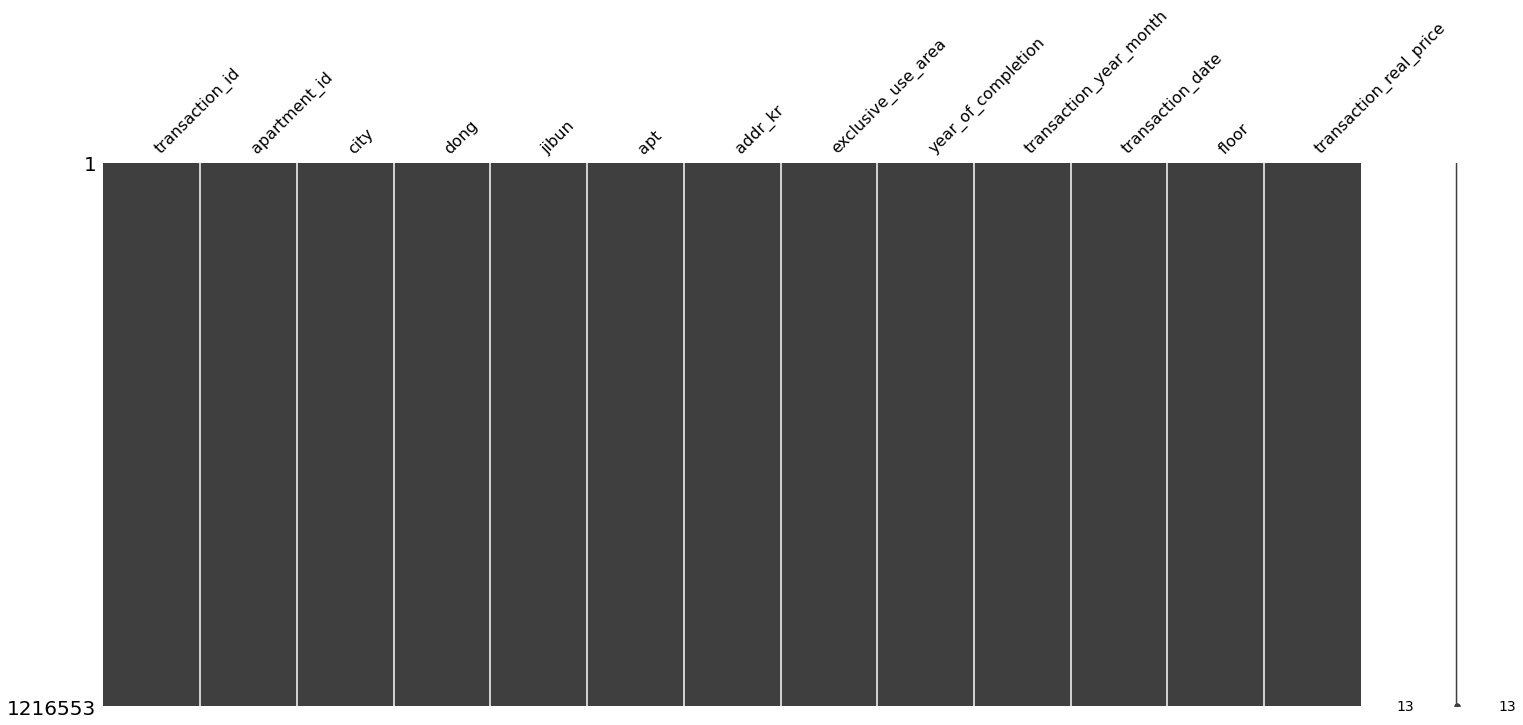

In [7]:
print(train.isna().sum().sum())
# sum().sum() 으로 sum을 2번 사용하는 이유는 sum()을 사용했을 경우 모든 컬럼에 대한 결측치에 대해 출력하지만 sum().sum()을 할 경우 그 모든 컬럼의 결측치에 대한 합을 출력하게 된다.

msno.matrix(train)

train 데이터는 결측치가 없는 것이 확인됐다.

0


<AxesSubplot:>

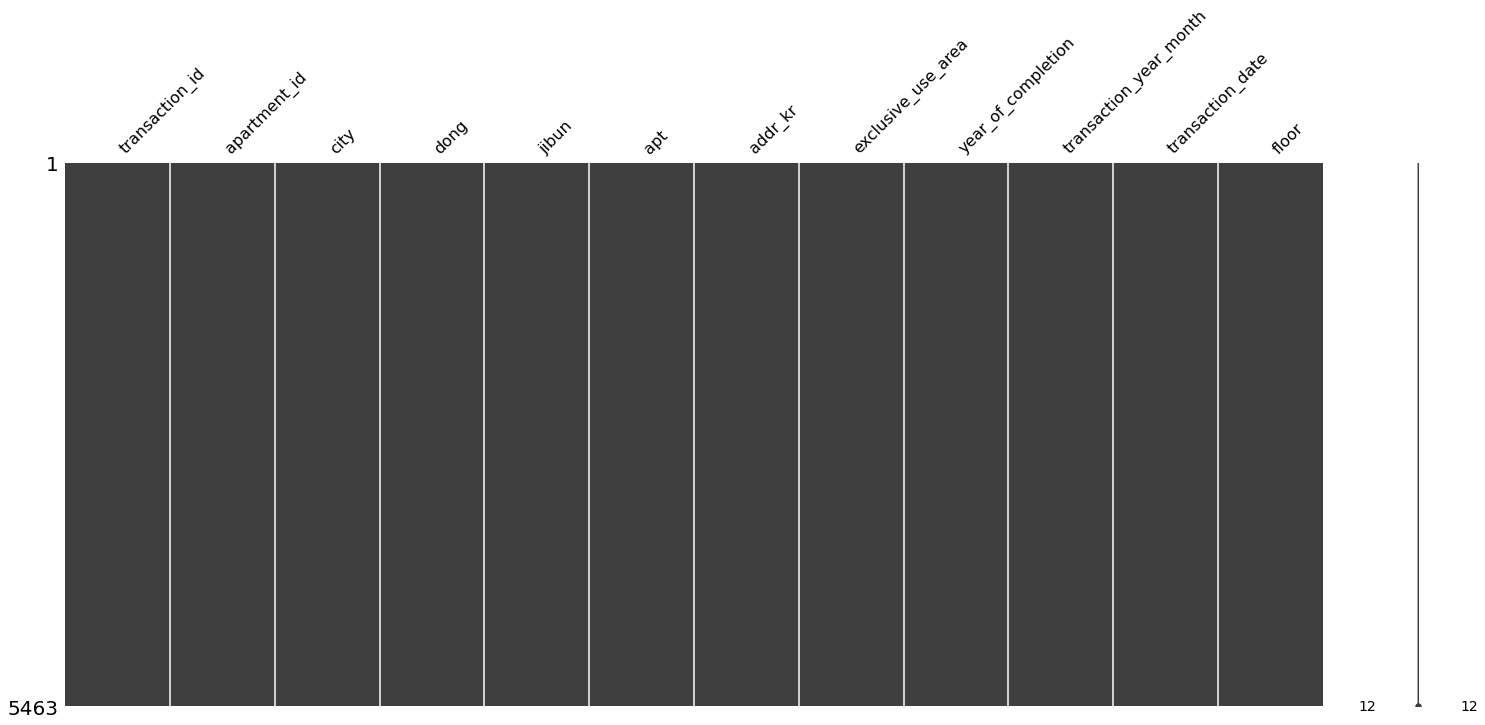

In [8]:
print(test.isna().sum().sum())

# 결측치 확인
msno.matrix(test)

test 데이터도 결측치는 없는 것으로 확인됐다.

## 2. 시각화

In [9]:
train['transaction_year_month'] = pd.to_datetime(train['transaction_year_month'], format='%Y%m')
test['transaction_year_month'] = pd.to_datetime(test['transaction_year_month'], format='%Y%m')

train['transaction_year'] = train['transaction_year_month'].dt.year
train['transaction_month'] = train['transaction_year_month'].dt.month

test['transaction_year'] = test['transaction_year_month'].dt.year
test['transaction_month'] = test['transaction_year_month'].dt.month

date 컬럼을 시간 컬럼으로 변경한 후 year 컬럼과 month컬럼을 분리합니다.

In [10]:
seoul_data = train[train['city'] == '서울특별시']
busan_data = train[train['city'] == '부산광역시']

서울 데이터와 부산 데이터를 분리합니다.

## 연도 별 가격변화 그래프

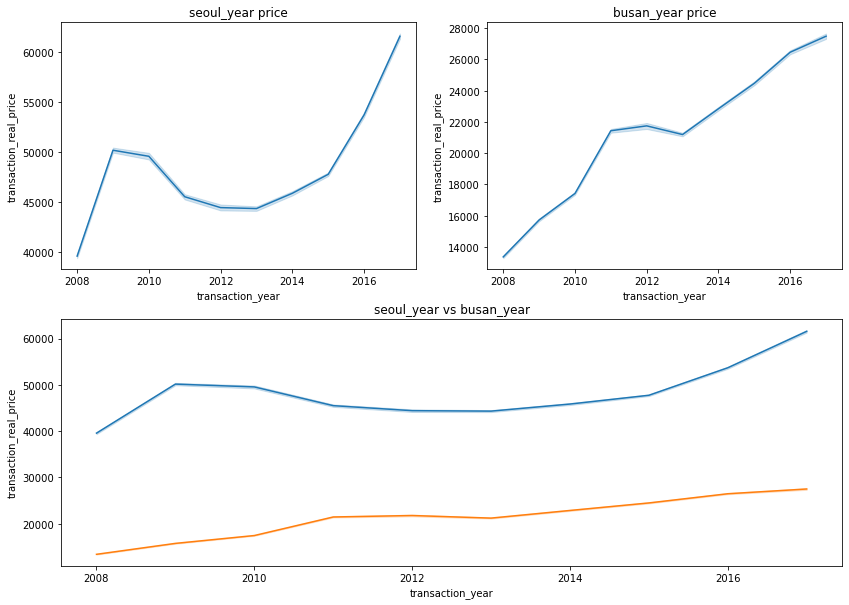

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.lineplot(data = seoul_data, x = 'transaction_year', y = 'transaction_real_price')
plt.title('seoul_year price')


plt.subplot(2, 2, 2)
sns.lineplot(data = busan_data, x = 'transaction_year', y = 'transaction_real_price')
plt.title('busan_year price')

plt.subplot(2, 1, 2)
sns.lineplot(data = seoul_data, x = 'transaction_year', y = 'transaction_real_price')
sns.lineplot(data = busan_data, x = 'transaction_year', y = 'transaction_real_price')
plt.title('seoul_year vs busan_year')

plt.show()

2013년부터 서울과 부산 둘 다 오르는 추세를 보여준다.

## 월 별 가격변화 그래프

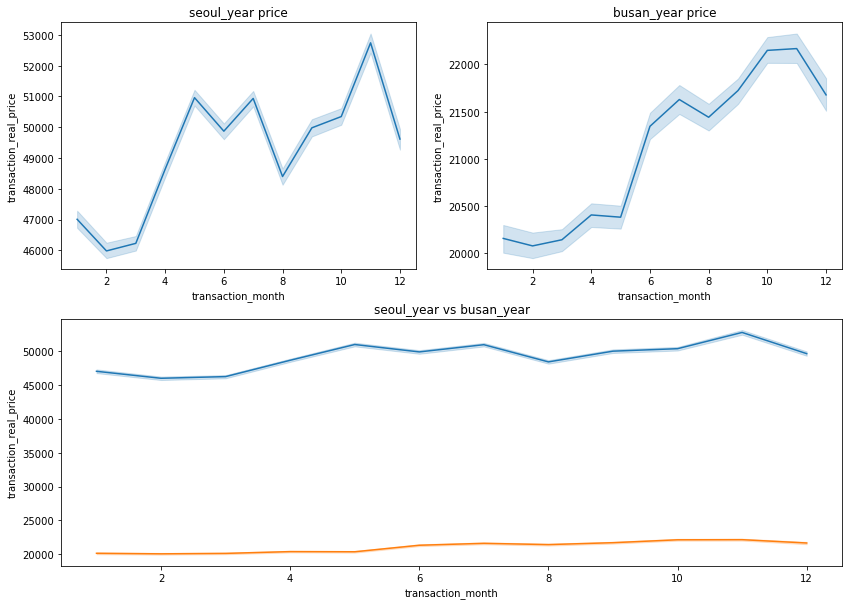

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.lineplot(data = seoul_data, x = 'transaction_month', y = 'transaction_real_price')
plt.title('seoul_year price')

plt.subplot(2, 2, 2)
sns.lineplot(data = busan_data, x = 'transaction_month', y = 'transaction_real_price')
plt.title('busan_year price')

plt.subplot(2, 1, 2)
sns.lineplot(data = seoul_data, x = 'transaction_month', y = 'transaction_real_price')
sns.lineplot(data = busan_data, x = 'transaction_month', y = 'transaction_real_price')
plt.title('seoul_year vs busan_year')

plt.show()

하반기에 평균가가 오르는 모습을 보여준다.

## 시 별 연간 거래량 그래프

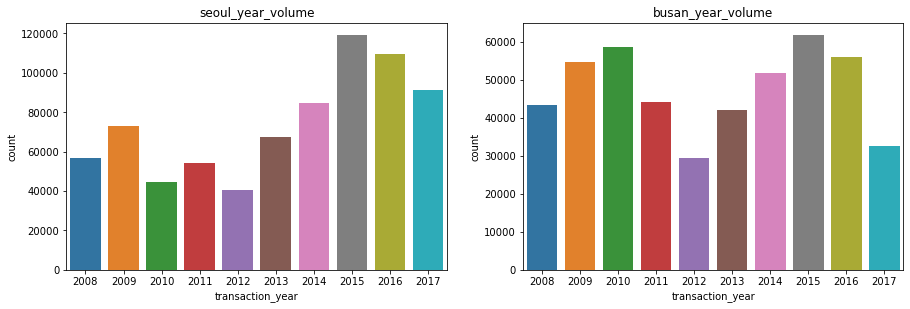

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(data = seoul_data, x ='transaction_year')
plt.title('seoul_year_volume')

plt.subplot(2, 2, 2)
sns.countplot(data = busan_data, x ='transaction_year')
plt.title('busan_year_volume')

plt.show()

서울과 부산 둘 다 2015년에 최고치를 달성했다.

## 시 별 월간 거래량 그래프

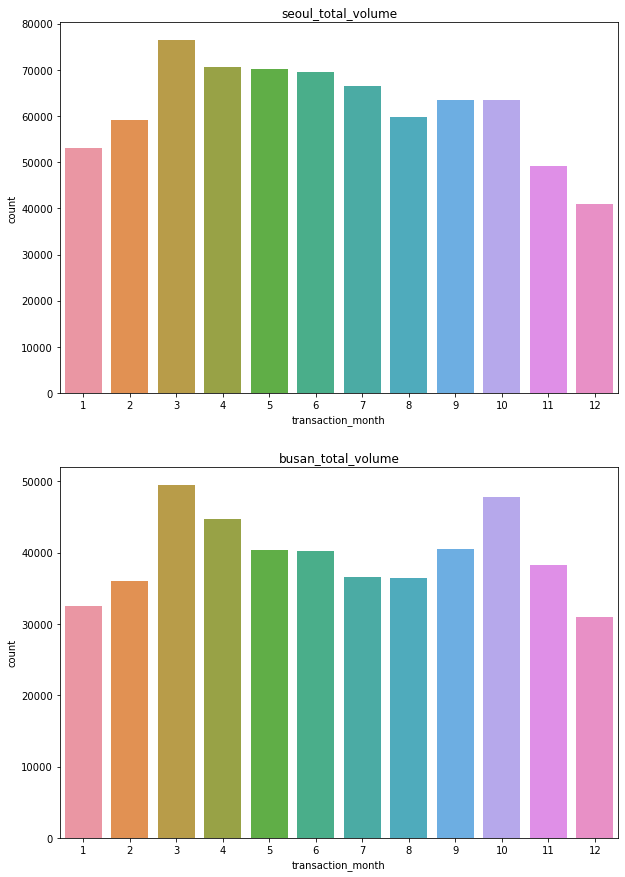

In [14]:
plt.subplots(figsize=(10,15))

plt.subplot(2,1,1)
sns.countplot(data = seoul_data, x ='transaction_month')
plt.title('seoul_total_volume')

plt.subplot(2,1,2)
sns.countplot(data = busan_data, x ='transaction_month')
plt.title('busan_total_volume')

plt.show()

겨울 시즌에 거래량이 줄어드는 모습을 확인할 수 있다.

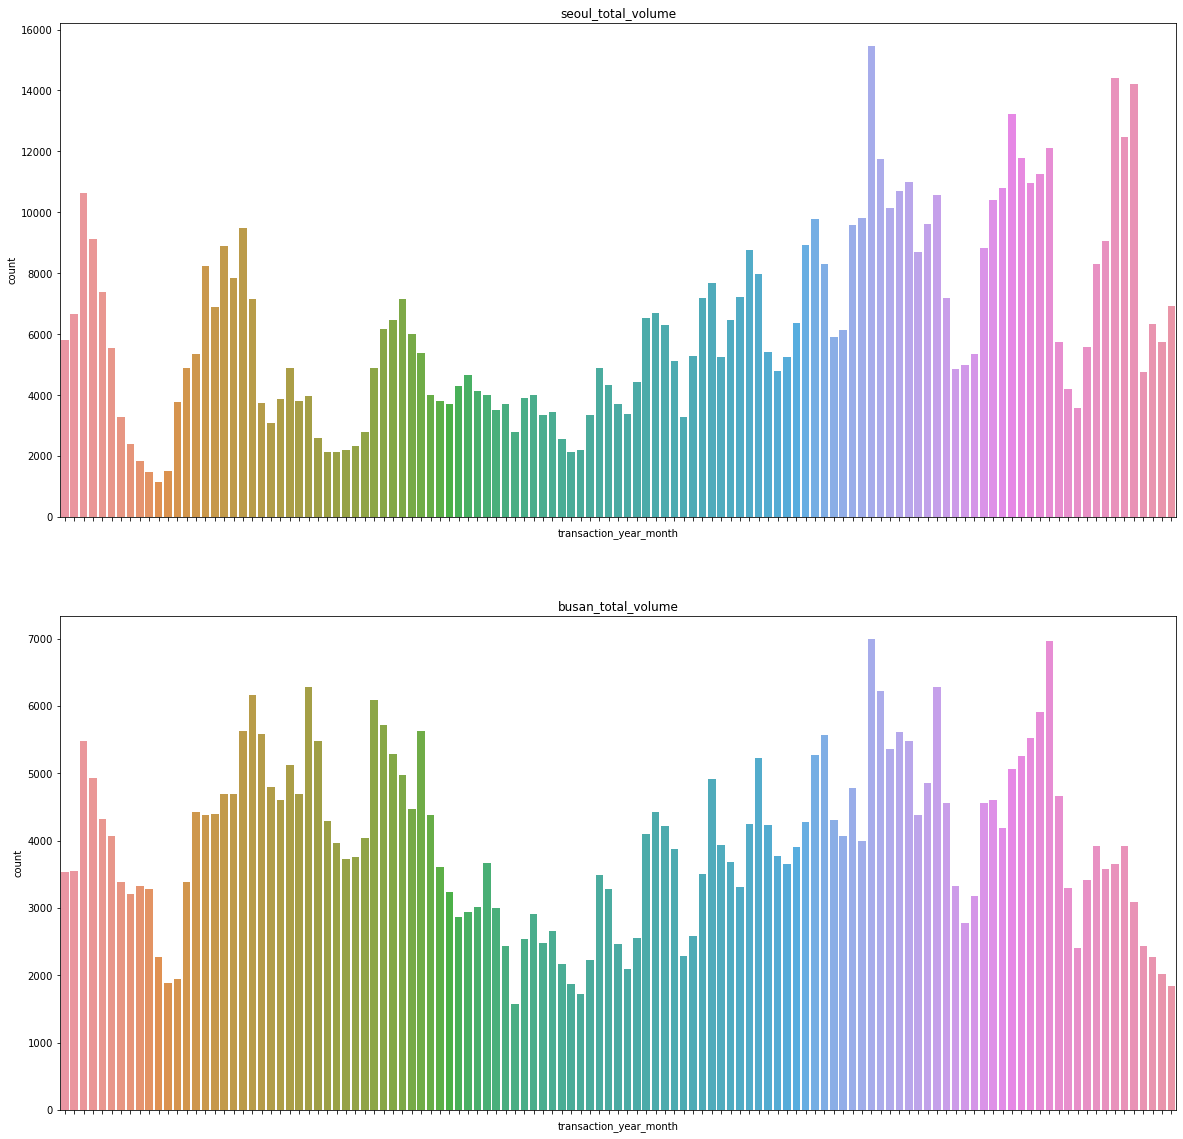

In [15]:
plt.subplots(figsize=(20, 20))
ticks = ['0801', '0901', '1001', '1101', '1201', '1301', '1401', '1501', '1601', '1701', '1801']

plt.subplot(2,1,1)
ax = sns.countplot(data = seoul_data, x ='transaction_year_month')
plt.title('seoul_total_volume')
ax.set_xticklabels([])

plt.subplot(2,1,2)
ax = sns.countplot(data = busan_data, x ='transaction_year_month')
plt.title('busan_total_volume')
ax.set_xticklabels([])

plt.show()

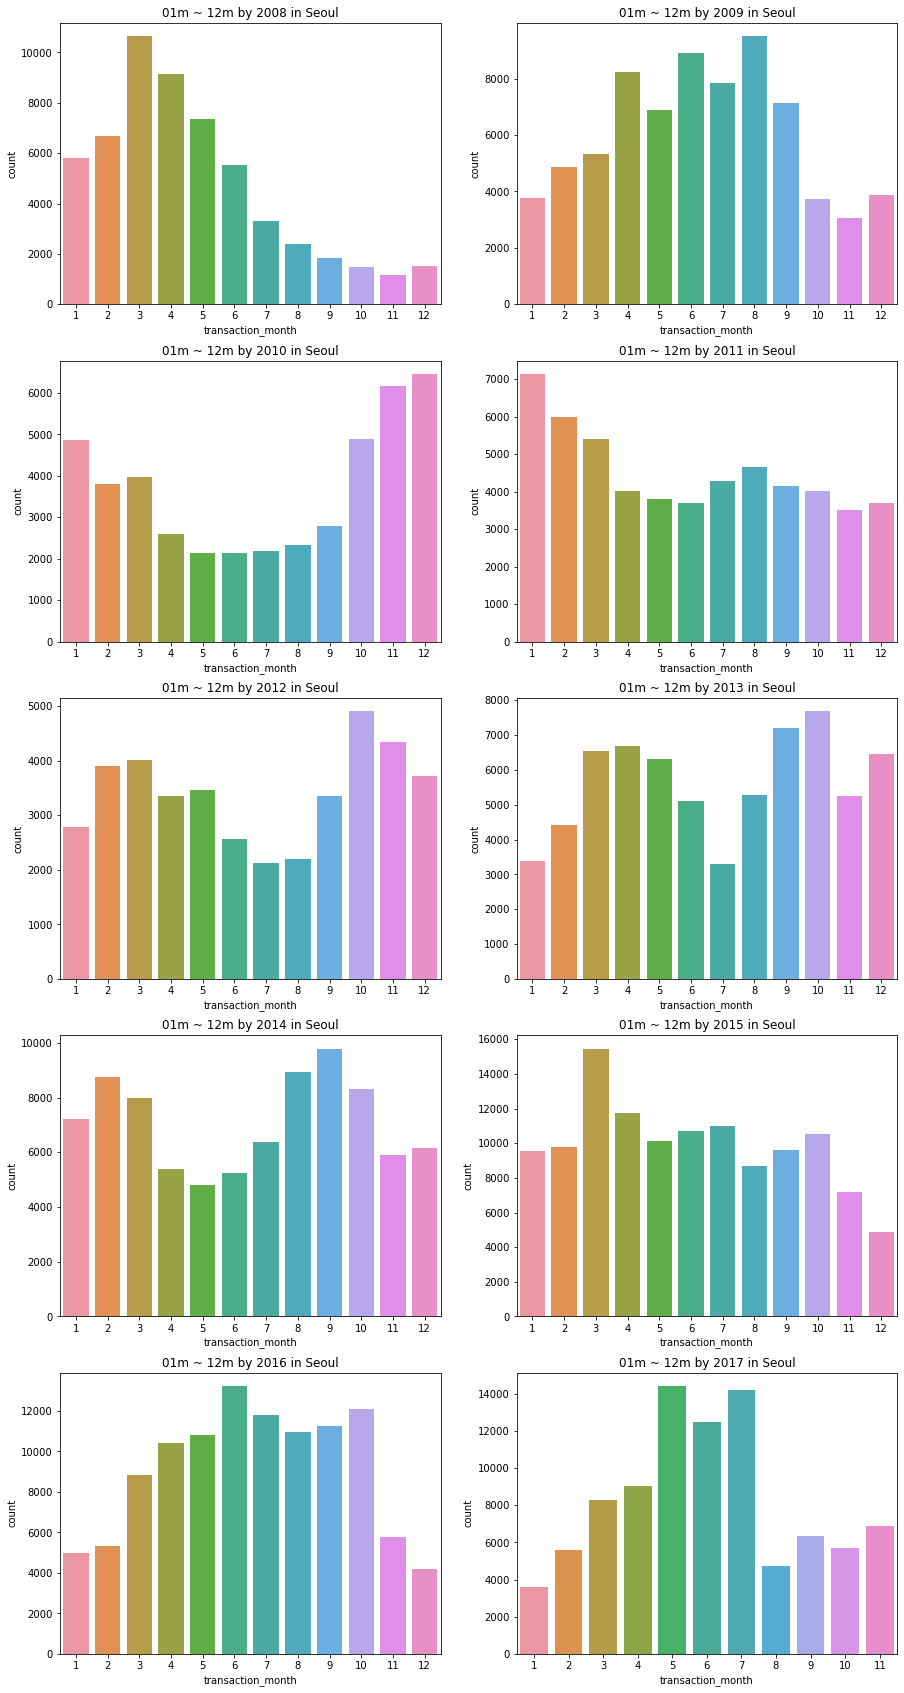

In [16]:
fig, ax = plt.subplots(5, 2, figsize=(15, 30))

count = 1
for i in seoul_data['transaction_year'].unique():
    year = seoul_data.loc[seoul_data['transaction_year'] == i]
    plt.subplot(5, 2, count)
    sns.countplot(data=year, x='transaction_month')
    plt.title(f'01m ~ 12m by {i} in Seoul')
    
    count += 1

plt.show()

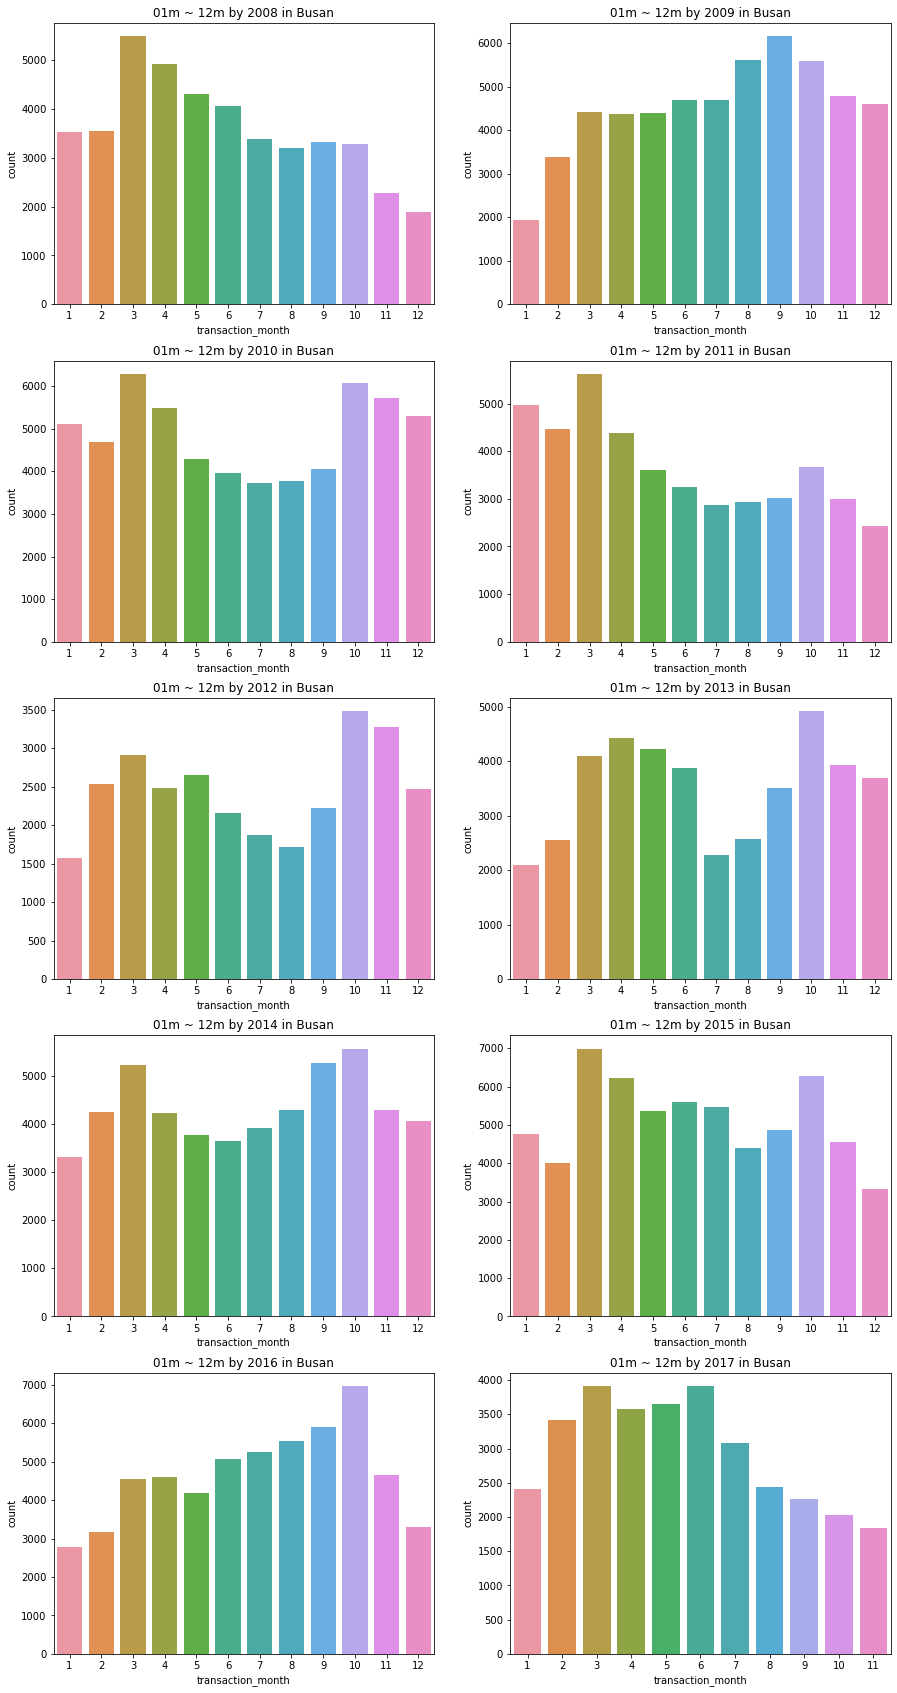

In [17]:
fig, ax = plt.subplots(5, 2, figsize=(15, 30))

count = 1
for i in busan_data['transaction_year'].unique():
    year = busan_data.loc[busan_data['transaction_year'] == i]
    plt.subplot(5, 2, count)
    sns.countplot(data=year, x='transaction_month')
    plt.title(f'01m ~ 12m by {i} in Busan')
    
    count += 1

plt.show()

아파트의 거래량 추세는 월별로도 움직이는 듯 하다.

## 시 별 일간 거래량 그래프

In [18]:
first_date = train.loc[train['transaction_date'] == '1~10']
second_date = train.loc[train['transaction_date'] == '11~20']
t1_date = train.loc[train['transaction_date'] == '21~28']
t2_date = train.loc[train['transaction_date'] == '21~29']
t3_date = train.loc[train['transaction_date'] == '21~30']
t4_date = train.loc[train['transaction_date'] == '21~31']
third_date = pd.concat([t1_date, t2_date, t3_date, t4_date], axis = 0)

s_first_date = seoul_data.loc[seoul_data['transaction_date'] == '1~10']
s_second_date = seoul_data.loc[seoul_data['transaction_date'] == '11~20']
s_t1_date = seoul_data.loc[seoul_data['transaction_date'] == '21~28']
s_t2_date = seoul_data.loc[seoul_data['transaction_date'] == '21~29']
s_t3_date = seoul_data.loc[seoul_data['transaction_date'] == '21~30']
s_t4_date = seoul_data.loc[seoul_data['transaction_date'] == '21~31']
s_third_date = pd.concat([s_t1_date, s_t2_date, s_t3_date, s_t4_date], axis = 0)

b_first_date = busan_data.loc[busan_data['transaction_date'] == '1~10']
b_second_date = busan_data.loc[busan_data['transaction_date'] == '11~20']
b_t1_date = busan_data.loc[busan_data['transaction_date'] == '21~28']
b_t2_date = busan_data.loc[busan_data['transaction_date'] == '21~29']
b_t3_date = busan_data.loc[busan_data['transaction_date'] == '21~30']
b_t4_date = busan_data.loc[busan_data['transaction_date'] == '21~31']
b_third_date = pd.concat([b_t1_date, b_t2_date, b_t3_date, b_t4_date], axis = 0)

total_date = pd.concat([first_date, second_date, third_date])

s_total_date = pd.concat([s_first_date, s_second_date, s_third_date])

b_total_date = pd.concat([b_first_date, b_second_date, b_third_date])

for k in set(s_total_date['transaction_date']):
    s_total_date.loc[s_total_date['transaction_date'] == '21~28', 'transaction_date'] = '21~31'
    s_total_date.loc[s_total_date['transaction_date'] == '21~29', 'transaction_date'] = '21~31'
    s_total_date.loc[s_total_date['transaction_date'] == '21~30', 'transaction_date'] = '21~31'


for k in set(b_total_date['transaction_date']):
    b_total_date.loc[b_total_date['transaction_date'] == '21~28', 'transaction_date'] = '21~31'
    b_total_date.loc[b_total_date['transaction_date'] == '21~29', 'transaction_date'] = '21~31'
    b_total_date.loc[b_total_date['transaction_date'] == '21~30', 'transaction_date'] = '21~31'


for k in set(total_date['transaction_date']):
    total_date.loc[total_date['transaction_date'] == '21~29', 'transaction_date'] = '21~31'
    total_date.loc[total_date['transaction_date'] == '21~28', 'transaction_date'] = '21~31'
    total_date.loc[total_date['transaction_date'] == '21~30', 'transaction_date'] = '21~31'

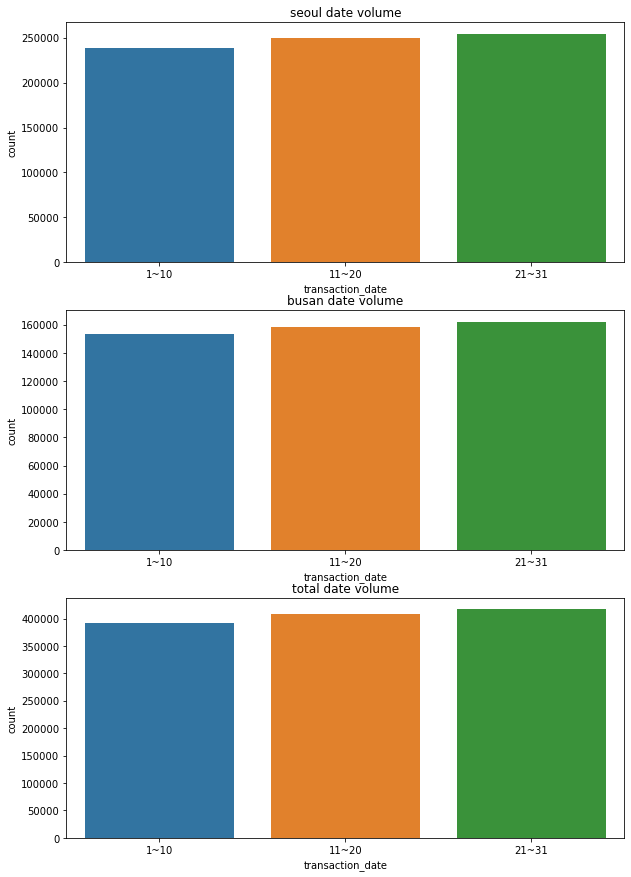

In [19]:
plt.subplots(3,1, figsize=(10,15))

plt.subplot(311)
sns.countplot(data = s_total_date, x = 'transaction_date')
plt.title('seoul date volume')

plt.subplot(312)
sns.countplot(data = b_total_date, x = 'transaction_date')
plt.title('busan date volume')

plt.subplot(313)
sns.countplot(data = total_date, x = 'transaction_date')
plt.title('total date volume')
plt.show()

아파트 거래량에 거래일은 영향이 없는 듯 하다.

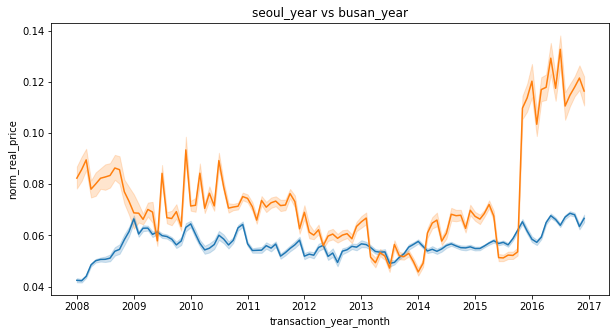

In [20]:
x = seoul_data['transaction_real_price'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))  # MinMaxScaler는 스케일을 조정하는 정규화 함수로, 모든 데이터가 0과 1사이의 값을 갖도록 해주는 함수입니다. 따라서 최댓값은 1로, 최솟값은 0으로 데이터의 범위를 조정해줍니다.
seoul_data['norm_real_price'] = pd.DataFrame(x_scaled)

z = busan_data['transaction_real_price'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
z_scaled = min_max_scaler.fit_transform(z.reshape(-1,1)) # MinMaxScaler는 스케일을 조정하는 정규화 함수로, 모든 데이터가 0과 1사이의 값을 갖도록 해주는 함수입니다. 따라서 최댓값은 1로, 최솟값은 0으로 데이터의 범위를 조정해줍니다.
busan_data['norm_real_price'] = pd.DataFrame(x_scaled)

plt.figure(figsize=(10, 5))
sns.lineplot(data = seoul_data, x = 'transaction_year_month', y = 'norm_real_price')
sns.lineplot(data = busan_data, x = 'transaction_year_month', y = 'norm_real_price')
plt.title('seoul_year vs busan_year')

plt.show()

거래날짜별 추세 변화를 MinMaxScaler를 이용해 좀 더 세밀하게 표현하고 서울과 부산의 차이를 비교시켜준다.

## 3. 데이터 전처리

In [21]:
train_len = len(train)
y = train['transaction_real_price']

data = pd.concat([train, test], axis=0)
data

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.820,2002,2008-01-01,21~31,2,37500.0,2008,1
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.170,1973,2008-01-01,1~10,6,20000.0,2008,1
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.740,2007,2008-01-01,1~10,6,38500.0,2008,1
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.390,2003,2008-01-01,11~20,15,118000.0,2008,1
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.430,2004,2008-01-01,21~31,3,120000.0,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,1174640,8965,서울특별시,양재동,15-9,위너스,양재동 15-9 위너스,84.050,2003,2017-10-01,11~20,7,NaN,2017,10
5459,1175575,3831,서울특별시,반포동,18-1,래미안퍼스티지,반포동 18-1 래미안퍼스티지,84.930,2009,2017-12-01,1~10,4,NaN,2017,12
5460,1157024,5550,서울특별시,구로동,256-1,삼성래미안,구로동 256-1 삼성래미안,110.188,2004,2017-12-01,21~31,23,NaN,2017,12
5461,1136863,3371,서울특별시,홍제동,24-16,동양드림,홍제동 24-16 동양드림,92.440,2005,2017-10-01,21~31,1,NaN,2017,10


train과 test를 결합해 data라는 데이터프레임을 생성했습니다.

이후 나중에 분리할 수 있도록 len(train)을 변수에 담아줍니다.

### 3-1. 구 추가하기

In [22]:
busan_dong_path = join(ext_data_dir, 'busan.csv')
seoul_dong_path = join(ext_data_dir, 'seoul.csv')

busan_dong = pd.read_csv(busan_dong_path, encoding='cp949')
seoul_dong = pd.read_csv(seoul_dong_path, encoding='cp949')

seoul_dong.head()

,시군구코드,법정동코드,행정동코드,시도명,시군구명,법정동명,행정동명,적용시작일,적용만료일
0,11740,10300,525,서울특별시,강동구,상일동,상일제1동,20210701,99991231
1,11740,10300,526,서울특별시,강동구,상일동,상일제2동,20210701,99991231
2,11290,10300,620,서울특별시,성북구,돈암동,정릉제1동,20210315,99991231
3,11530,11200,800,서울특별시,구로구,항동,항동,20200101,99991231
4,11305,10300,615,서울특별시,강북구,수유동,수유1동,20190101,99991231


우리 train.csv에는 법정동으로 정리되어 있다.

건축물대장 법정동 코드 데이터를 불러와서 시군구명과 법정동을 가지고와서 일치하는 법정동에 구 컬럼을  추가해보자.

서울의 구만 따로 분류해보자.

In [23]:
# 서울 구만 분리하여 딕셔너리 생성

seoul_gu = seoul_dong['법정동명'].groupby(seoul_dong['시군구명']).unique()
seoul_gu = dict(seoul_gu)

seoul_gu.keys()

dict_keys(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'])

서울시 강남구 동들을 먼저 살펴보자.

In [24]:
seoul_gu['강남구']

array(['일원동', '압구정동', '신사동', '청담동', '대치동', '개포동', '수서동', '논현동', '도곡동',
       '포이동', '강남구', '삼성동', '세곡동', '자곡동', '율현동', '역삼동', '잠원동', '양재동',
       '원지동', '우면동', '염곡동', '내곡동', '신원동', '방배동', '하일동', '상일동', '명일동',
       '고덕동', '암사동', '천호동', '성내동', '풍납동', '길동', '둔촌동', '거여동', '마천동',
       '방이동', '이동', '오금동', '송파동', '석촌동', '가락동', '문정동', '잠실동', '신천동',
       '삼전동', '송금동', '장지동', '학동', '반포동', '서초동', '압구정1동', '압구정2동', '청담1동',
       '청담2동', '삼성1동', '삼성2동', '대치1동', '대치2동', '대치3동', '대치4동', '역삼1동',
       '역삼2동', '도곡1동', '도곡2동', '개포1동', '개포2동', '개포3동', '개포4동'],
      dtype=object)

부산들의 구들은 어떨까?

In [25]:
# 부산 구만 분리하여 딕셔너리 생성

busan_gu = busan_dong['법정동명'].groupby(busan_dong['시군구명']).unique()
busan_gu = dict(busan_gu)

busan_gu.keys()

dict_keys(['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구'])

부산의 강서구의 동들을 살펴보자.

In [26]:
busan_gu['강서구']

array(['명지동', '천성동', '눌차동', '동선동', '성북동', '대항동', '대저1동', '대저2동', '봉림동',
       '송정동', '화전동', '녹산동', '생곡동', '미음동', '범방동', '신호동', '강동동', '죽림동',
       '식만동', '죽동동', '구랑동', '지사동', '강서구'], dtype=object)

In [27]:
seoul_gu.keys() & busan_gu.keys()

{'강서구', '중구'}

구 이름이 중복되진 않는지 확인해보니 강서구와 중구가 서울에도 부산에도 있다.

중복되지 않게 광역지자체명을 키워드로 추가하자.

In [28]:
seoul_gu = {'서울'+k: '서울'+v for k, v in seoul_gu.items()}
busan_gu = {'부산'+k: '부산'+v for k, v in busan_gu.items()}

print(seoul_gu.keys())
print(busan_gu.keys())

dict_keys(['서울강남구', '서울강동구', '서울강북구', '서울강서구', '서울관악구', '서울광진구', '서울구로구', '서울금천구', '서울노원구', '서울도봉구', '서울동대문구', '서울동작구', '서울마포구', '서울서대문구', '서울서초구', '서울성동구', '서울성북구', '서울송파구', '서울양천구', '서울영등포구', '서울용산구', '서울은평구', '서울종로구', '서울중구', '서울중랑구'])
dict_keys(['부산강서구', '부산금정구', '부산기장군', '부산남구', '부산동구', '부산동래구', '부산부산진구', '부산북구', '부산사상구', '부산사하구', '부산서구', '부산수영구', '부산연제구', '부산영도구', '부산중구', '부산해운대구'])


양이 너무 많아 키 값만 확인하자.

In [29]:
#gu = dict(seoul_gu | busan_gu)
seoul_gu.update(busan_gu)
gu = seoul_gu
gu.keys()

dict_keys(['서울강남구', '서울강동구', '서울강북구', '서울강서구', '서울관악구', '서울광진구', '서울구로구', '서울금천구', '서울노원구', '서울도봉구', '서울동대문구', '서울동작구', '서울마포구', '서울서대문구', '서울서초구', '서울성동구', '서울성북구', '서울송파구', '서울양천구', '서울영등포구', '서울용산구', '서울은평구', '서울종로구', '서울중구', '서울중랑구', '부산강서구', '부산금정구', '부산기장군', '부산남구', '부산동구', '부산동래구', '부산부산진구', '부산북구', '부산사상구', '부산사하구', '부산서구', '부산수영구', '부산연제구', '부산영도구', '부산중구', '부산해운대구'])

gu 라는 딕셔너리에 하나로 결합했다.

데이터셋의 동을 검색해서 맞는 구 컬럼을 추가해줘야 한다.

In [30]:
set(data[data['city']== '서울특별시']['dong'].unique()) & set(data[data['city']== '부산광역시']['dong'].unique())

{'부암동', '사직동', '송정동', '중동'}

데이터셋에도 중복되는 동 이름은 없는지 확인해봤다.

중복방지 키워드를 똑같이 추가해줘야 한다.

In [31]:
data['city'] = data['city'].apply(lambda x: x[:2])
data['dong'] = data['city'] + data['dong']

data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month
0,0,7622,서울,서울신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,2008-01-01,21~31,2,37500.0,2008,1
1,1,5399,서울,서울필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,2008-01-01,1~10,6,20000.0,2008,1
2,2,3578,서울,서울필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,2008-01-01,1~10,6,38500.0,2008,1
3,3,10957,서울,서울내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,2008-01-01,11~20,15,118000.0,2008,1
4,4,10639,서울,서울내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,2008-01-01,21~31,3,120000.0,2008,1


서울특별시는 서울로, 신교동은 서울신교동으로 변경했다.

동 이름은 gu 딕셔너리의 밸류에 맞게 변경한 것이고,

서울특별시에서 서울로 변경한 것은 동에 키워드를 편하게 추가하기 위함이다.

In [32]:
#def searchGu(dong): #너무느림
#    for k, v in gu.items():
#        if dong in v:
#            return k

#data['gu'] = data['dong'].apply(searchGu)

#data.head()


for k, v in gu.items():
    data.loc[data['dong'].isin(v), 'gu'] = k # isin() 함수는 어떠한 대상 안에 해당 요소가 존재하는지 여부를 확인하는 함수로 True(존재함), False(존재하지 않음)와 같은 bool값으로 반환해준다
data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month,gu
0,0,7622,서울,서울신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,2008-01-01,21~31,2,37500.0,2008,1,서울종로구
1,1,5399,서울,서울필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,2008-01-01,1~10,6,20000.0,2008,1,서울종로구
2,2,3578,서울,서울필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,2008-01-01,1~10,6,38500.0,2008,1,서울종로구
3,3,10957,서울,서울내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,2008-01-01,11~20,15,118000.0,2008,1,서울종로구
4,4,10639,서울,서울내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,2008-01-01,21~31,3,120000.0,2008,1,서울종로구


데이터셋에 맞는 구 컬럼이 추가되었다.

주석 처리된 부분은 처음에 썼던 코드인데 실행이 너무 오래 걸려 새로운 방법을 찾아서 해결했다.

결과는 굉장히 유의미한 속도 차이를 보여준다.

In [33]:
data['gu'].isna().sum()

0

결측치도 없는 것으로 확인됐다.

### 3-2. 동의 공원 면적 컬럼 추가하기

In [34]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

미리 가져왔던 공원 데이터를 확인해봤습니다.

각 컬럼에 대한 설명은 이렇습니다.
```
1. city : 시  
2. gu : 구  
3. dong : 동  
4. park_name : 공원 이름  
5. park_type : 공원 종류  
6. park_area : 공원 면적  
7. park_exercise_facility : 공원 운동시설  
8. park_entertainment_facility : 공원 유희시설  
9. park_benefit_facility : 공원 편의시설  
10. park_cultural_facility : 공원 교양시설  
11. park_open_year : 공원 개장년도  
12. reference_date : 데이터 기록일
```

In [35]:
park.head()

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


결측치가 많군요 괜찮습니다.

저는 동과 개장년도, 공원 면적만 쓸겁니다.

하지만 그 전에 먼저 공원 데이터에도 중복방지 키워드를 넣어야할 것 같습니다.

In [36]:
park['city'] = park['city'].apply(lambda x: x[:2])
park['dong'] = park['city'] + park['dong']

park = park[['dong', 'park_area', 'park_open_year']]

park

,dong,park_area,park_open_year
0,부산대연동,55227.0,1944.0
1,부산대연동,75465.0,1944.0
2,부산대연동,422.1,1965.0
3,부산대연동,499.8,1968.0
4,부산용호동,1500.2,1970.0
...,...,...,...
1354,서울천왕동,1500.0,2006.0
1355,서울천왕동,5415.0,2006.0
1356,서울천왕동,60975.0,2006.0
1357,서울항동,100809.0,2005.0


In [37]:
print(park.dong.isna().sum())
print(park.park_area.isna().sum())

0
0


동과 공원 면적에는 결측치가 없습니다.

In [38]:
unit_area_dict = dict(park.groupby(park['dong'])['park_area'].sum())

unit_area_dict

{'부산가야동': 72762.0,
 '부산감만동': 14002.0,
 '부산감천동': 128783.0,
 '부산개금동': 38502.0,
 '부산거제동': 12417.1,
 '부산광안동': 71177.7,
 '부산괘법동': 624606.0,
 '부산괴정동': 21517.8,
 '부산구서동': 8643.0,
 '부산구평동': 17858.9,
 '부산구포동': 120128.6,
 '부산금곡동': 36670.7,
 '부산금사동': 135081.9,
 '부산낙민동': 20972.2,
 '부산남부민동': 1880.0,
 '부산남산동': 15432.6,
 '부산남천동': 2045.0,
 '부산녹산동': 12211.9,
 '부산다대동': 595648.4,
 '부산당감동': 26032.9,
 '부산당리동': 104389.3,
 '부산대연동': 411583.1,
 '부산대저1동': 646.0,
 '부산덕천동': 186211.3,
 '부산덕포동': 11006.0,
 '부산동삼동': 847899.0,
 '부산만덕동': 407124.69999999995,
 '부산망미동': 12595.0,
 '부산명륜동': 584030.0,
 '부산명장동': 142798.3,
 '부산명지동': 348482.8,
 '부산모라동': 17263.8,
 '부산문현동': 16607.0,
 '부산민락동': 8224.0,
 '부산반송동': 44253.3,
 '부산반여동': 43116.7,
 '부산범일동': 31133.0,
 '부산범전동': 470758.0,
 '부산복천동': 48220.0,
 '부산부곡동': 10676.0,
 '부산부암동': 9950.2,
 '부산사직동': 18913.4,
 '부산서대신동1가': 205950.2,
 '부산서대신동3가': 2104835.0,
 '부산서동': 1155.4,
 '부산송정동': 58705.0,
 '부산수안동': 1732.7,
 '부산수영동': 23284.0,
 '부산신평동': 15991.1,
 '부산신호동': 69323.0,
 '부산안락동': 101080.6,
 '부산암

각 동의 공원 면적입니다.

In [39]:
for k in set(park['dong']):
    data.loc[data['dong'] == k, 'unit_area'] = unit_area_dict[k]

data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month,gu,unit_area
0,0,7622,서울,서울신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,2008-01-01,21~31,2,37500.0,2008,1,서울종로구,NaN
1,1,5399,서울,서울필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,2008-01-01,1~10,6,20000.0,2008,1,서울종로구,NaN
2,2,3578,서울,서울필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,2008-01-01,1~10,6,38500.0,2008,1,서울종로구,NaN
3,3,10957,서울,서울내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,2008-01-01,11~20,15,118000.0,2008,1,서울종로구,NaN
4,4,10639,서울,서울내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,2008-01-01,21~31,3,120000.0,2008,1,서울종로구,NaN


결측치가 생기는군요. 학습에 방해가 되니 결측치는 0으로 지정해주겠습니다.

In [40]:
data['unit_area'] = data['unit_area'].fillna(0) # fillna() 함수는 결측치를 원하는 값으로 변경해주는 함수이다.

data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month,gu,unit_area
0,0,7622,서울,서울신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,2008-01-01,21~31,2,37500.0,2008,1,서울종로구,0.0
1,1,5399,서울,서울필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,2008-01-01,1~10,6,20000.0,2008,1,서울종로구,0.0
2,2,3578,서울,서울필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,2008-01-01,1~10,6,38500.0,2008,1,서울종로구,0.0
3,3,10957,서울,서울내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,2008-01-01,11~20,15,118000.0,2008,1,서울종로구,0.0
4,4,10639,서울,서울내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,2008-01-01,21~31,3,120000.0,2008,1,서울종로구,0.0


### 3-3. 공원 개장유무 컬럼 추가하기

In [41]:
print(park.park_open_year.isna().sum())

422


개장년도에 결측치가 있네요.  과감하게 지우겠습니다.

In [42]:
print(len(park))
print(park['park_open_year'].count())

1359
937


개장년도가 정상적으로 담긴 데이터는 1359개 중 937개입니다.

In [43]:
park.dropna(subset=['park_open_year'], inplace=True)

park['park_open_year'].isna().sum()

0

In [44]:
print(len(park))
print(park['park_open_year'].count())

937
937


`park_open_year` 컬럼이 NaN인 데이터만 무사히 지워졌습니다.  

공원의 개장년도가 해당 동 아파트의 당시 거래가에 영향을 주는지 알아보겠습니다.  

먼저 거래가 가장 활발히 이뤄진 동을 살펴보겠습니다.

In [45]:
data['dong'].value_counts()

서울상계동    29436
부산좌동     23283
부산화명동    21543
부산용호동    17428
서울중계동    17141
         ...  
서울주성동        2
서울누상동        2
서울구수동        1
서울효제동        1
서울옥인동        1
Name: dong, Length: 477, dtype: int64

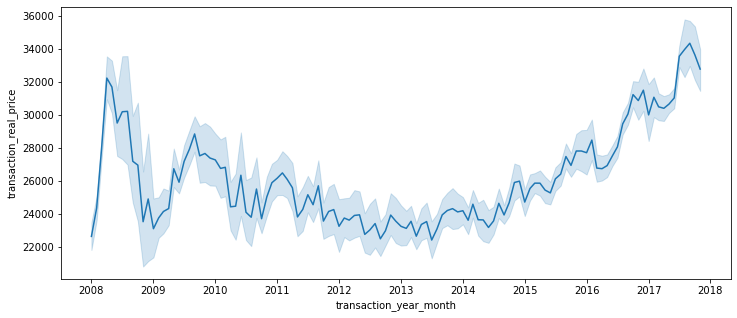

In [46]:
most_transaction_by_dong = data.loc[data['dong'] == '서울상계동']

plt.figure(figsize=[12, 5])
sns.lineplot(data=most_transaction_by_dong, x='transaction_year_month', y='transaction_real_price')
plt.show()

2008년부터 2017년 까지의 데이터입니다.

In [47]:
park.loc[park['dong'] == '서울상계동']

,dong,park_area,park_open_year


엥? 공원 데이터에는 상계동이 없습니다.  

두 번째로 많은 동을 확인해보죠.

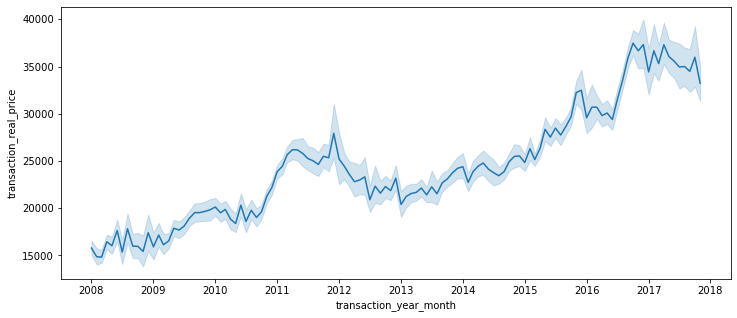

In [48]:
most_transaction_by_dong = data.loc[data['dong'] == '부산좌동']

plt.figure(figsize=[12, 5])
sns.lineplot(data=most_transaction_by_dong, x='transaction_year_month', y='transaction_real_price')
plt.show()

In [49]:
park.loc[park['dong'] == '부산좌동']

,dong,park_area,park_open_year
527,부산좌동,10737.0,1992.0
529,부산좌동,5708.0,1992.0
530,부산좌동,1804.0,1992.0
531,부산좌동,3760.0,1992.0
532,부산좌동,1878.6,1992.0
533,부산좌동,1803.2,1992.0
534,부산좌동,1793.1,1992.0
535,부산좌동,1972.0,1992.0
536,부산좌동,1806.8,1992.0
537,부산좌동,1805.6,1992.0


이번엔 공원이 1992년에 개장한 공원뿐이군요.  
2008년 이후에 개장한 공원만 봐야겠습니다.

In [50]:
park = park.loc[park['park_open_year'] >= 2008]

park

,dong,park_area,park_open_year
27,부산용호동,10659.0,2008.0
28,부산문현동,4175.0,2008.0
29,부산우암동,650.0,2008.0
30,부산문현동,3543.0,2008.0
31,부산대연동,6811.0,2008.0
...,...,...,...
1339,서울개봉동,3023.0,2008.0
1340,서울개봉동,657.0,2010.0
1345,서울온수동,2500.0,2008.0
1346,서울온수동,3200.0,2008.0


In [51]:
dong_list = park['dong'].unique()
dong_list

array(['부산용호동', '부산문현동', '부산우암동', '부산대연동', '부산감만동', '부산용당동', '부산연산동',
       '서울우면동', '부산양정동', '부산부암동', '서울신정동', '서울남현동', '서울신대방동', '서울흑석동',
       '서울사당동', '서울상도동', '서울무악동', '서울명륜3가', '서울신문로1가', '서울만리동2가', '부산화명동',
       '부산만덕동', '부산덕천동', '부산구포동', '부산동삼동', '서울휘경동', '서울답십리동', '서울회기동',
       '서울전농동', '서울제기동', '서울용두동', '서울당산동4가', '서울당산동5가', '부산부곡동', '부산회동동',
       '부산금사동', '서울행당동', '서울하왕십리동', '서울성수동1가', '부산중동', '부산재송동', '부산우동',
       '서울구산동', '서울응암동', '서울대조동', '서울진관동', '서울북가좌동', '서울홍제동', '서울북아현동',
       '부산대저1동', '부산명지동', '부산녹산동', '부산복천동', '부산안락동', '부산사직동', '부산명장동',
       '부산온천동', '부산칠산동', '부산서대신동1가', '부산서대신동3가', '부산남부민동', '부산암남동',
       '서울문배동', '서울한남동', '서울이태원동', '서울한강로3가', '부산다대동', '부산괴정동', '부산구평동',
       '부산감천동', '부산신평동', '부산망미동', '부산광안동', '부산남천동', '부산엄궁동', '부산모라동',
       '부산주례동', '부산덕포동', '서울구로동', '서울개봉동', '서울온수동', '서울오류동'], dtype=object)

In [52]:
for name in dong_list:
    count = data['dong'].loc[data['dong'] == name].count()
    print(f'{name} : {count}')

부산용호동 : 17428
부산문현동 : 5545
부산우암동 : 2123
부산대연동 : 11249
부산감만동 : 2562
부산용당동 : 1373
부산연산동 : 16435
서울우면동 : 1465
부산양정동 : 4478
부산부암동 : 7466
서울신정동 : 16985
서울남현동 : 825
서울신대방동 : 3677
서울흑석동 : 2578
서울사당동 : 6884
서울상도동 : 7486
서울무악동 : 983
서울명륜3가 : 6
서울신문로1가 : 10
서울만리동2가 : 17
부산화명동 : 21543
부산만덕동 : 9230
부산덕천동 : 6300
부산구포동 : 6067
부산동삼동 : 6872
서울휘경동 : 2702
서울답십리동 : 4761
서울회기동 : 548
서울전농동 : 3046
서울제기동 : 1465
서울용두동 : 1527
서울당산동4가 : 2193
서울당산동5가 : 1843
부산부곡동 : 8659
부산회동동 : 73
부산금사동 : 181
서울행당동 : 4926
서울하왕십리동 : 2300
서울성수동1가 : 2518
부산중동 : 7160
부산재송동 : 14386
부산우동 : 12653
서울구산동 : 1506
서울응암동 : 3534
서울대조동 : 1004
서울진관동 : 6197
서울북가좌동 : 2465
서울홍제동 : 5239
서울북아현동 : 1061
부산대저1동 : 5
부산명지동 : 7231
부산녹산동 : 7
부산복천동 : 835
부산안락동 : 6068
부산사직동 : 7177
부산명장동 : 2736
부산온천동 : 10969
부산칠산동 : 45
부산서대신동1가 : 464
부산서대신동3가 : 1594
부산남부민동 : 572
부산암남동 : 1959
서울문배동 : 683
서울한남동 : 1742
서울이태원동 : 547
서울한강로3가 : 460
부산다대동 : 15616
부산괴정동 : 6769
부산구평동 : 889
부산감천동 : 2483
부산신평동 : 3822
부산망미동 : 3968
부산광안동 : 8291
부산남천동 : 6450
부산엄궁동 : 5380
부산모라동 : 5793
부산주례동

데이터는 많을수록 좋습니다.  
아무거나 골라서 살펴보도록 하죠.

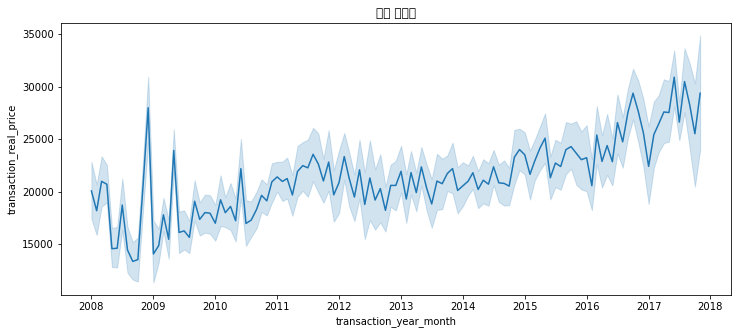

In [53]:
most_transaction_by_dong = data.loc[data['dong'] == '부산부곡동']

plt.figure(figsize=[12, 5])
sns.lineplot(data=most_transaction_by_dong, x='transaction_year_month', y='transaction_real_price')
plt.title('부산 부곡동')
plt.show()

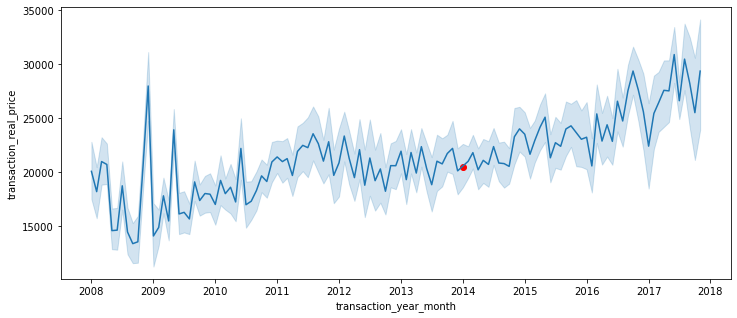

In [54]:
data_a = data.loc[data['dong'] == '부산부곡동']
data_b = park.loc[park['dong'] == '부산부곡동']

plt.figure(figsize=[12, 5])
sns.lineplot(data=data_a, x='transaction_year_month', y='transaction_real_price')
plt.scatter(x=pd.to_datetime(data_b['park_open_year'], format='%Y'), y=data_b['park_open_year']+18500, color='r')
plt.show()

빨간점이 공원 개장년도입니다.  
다른 동도 확인해보겠습니다.

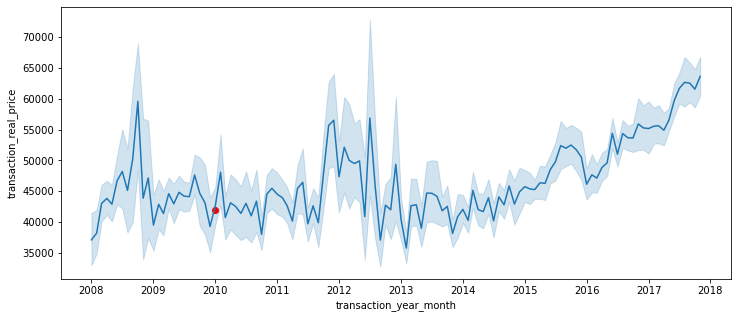

In [55]:
data_a = data.loc[data['dong'] == '서울사당동']
data_b = park.loc[park['dong'] == '서울사당동']

plt.figure(figsize=[12, 5])
sns.lineplot(data=data_a, x='transaction_year_month', y='transaction_real_price')
plt.scatter(x=pd.to_datetime(data_b['park_open_year'], format='%Y'), y=data_b['park_open_year']+40000, color='r')
plt.show()

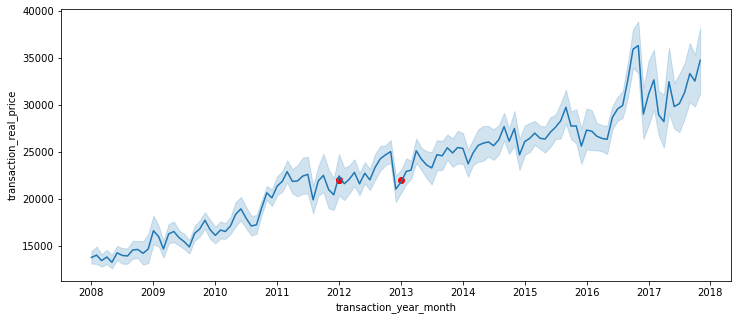

In [56]:
data_a = data.loc[data['dong'] == '부산화명동']
data_b = park.loc[park['dong'] == '부산화명동']

plt.figure(figsize=[12, 5])
sns.lineplot(data=data_a, x='transaction_year_month', y='transaction_real_price')
plt.scatter(x=pd.to_datetime(data_b['park_open_year'], format='%Y'), y=data_b['park_open_year']+20000, color='r')
plt.show()

사용해봐도 좋을 것 같습니다

In [57]:
park_open_year = {i: park['park_open_year'].loc[park['dong']==i].values for i in park['dong'].unique()} # 골프 죄송합니다

park_open_year

{'부산용호동': array([2008.]),
 '부산문현동': array([2008., 2008., 2013.]),
 '부산우암동': array([2008.]),
 '부산대연동': array([2008., 2008., 2012., 2012.]),
 '부산감만동': array([2014.]),
 '부산용당동': array([2016.]),
 '부산연산동': array([2014., 2009., 2012., 2010., 2009.]),
 '서울우면동': array([2009., 2009., 2009.]),
 '부산양정동': array([2009.]),
 '부산부암동': array([2008.]),
 '서울신정동': array([2012.]),
 '서울남현동': array([2013.]),
 '서울신대방동': array([2012.]),
 '서울흑석동': array([2008., 2012.]),
 '서울사당동': array([2010.]),
 '서울상도동': array([2012., 2012., 2012.]),
 '서울무악동': array([2015.]),
 '서울명륜3가': array([2009., 2010.]),
 '서울신문로1가': array([2009.]),
 '서울만리동2가': array([2017., 2017.]),
 '부산화명동': array([2012., 2012., 2013.]),
 '부산만덕동': array([2016., 2012., 2015., 2016.]),
 '부산덕천동': array([2013.]),
 '부산구포동': array([2011., 2014.]),
 '부산동삼동': array([2010., 2010., 2013.]),
 '서울휘경동': array([2010., 2012., 2014.]),
 '서울답십리동': array([2010.]),
 '서울회기동': array([2011.]),
 '서울전농동': array([2011.]),
 '서울제기동': array([2012.]),
 '서울용두동': array([2015.]),
 '서울당

무슨 공원인지는 잘 모르지만 그래도 동마다 공원 개장년도가 잘 담아졌습니다.

In [58]:
for k, v in park_open_year.items():
    data.loc[(data['dong'] == k) & (data['transaction_year'].isin(v)), 'park'] = 1
    
data['park'] = data['park'].fillna(0)
data.loc[data['park'] == 1]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month,gu,unit_area,park
461,461,11378,서울,서울명륜3가,1-30,한빛,명륜3가 1-30 한빛,59.730,1999,2009-01-01,21~31,5,24300.0,2009,1,서울종로구,207638.0,1.0
555,555,7348,서울,서울신문로1가,238,신문로맨션,신문로1가 238 신문로맨션,98.310,1981,2009-04-01,1~10,8,35100.0,2009,4,서울종로구,873.0,1.0
3446,3446,9295,서울,서울무악동,60,인왕산아이파크,무악동 60 인왕산아이파크,84.858,2008,2015-01-01,1~10,11,64300.0,2015,1,서울종로구,5136.0,1.0
3447,3447,9295,서울,서울무악동,60,인왕산아이파크,무악동 60 인왕산아이파크,84.858,2008,2015-01-01,1~10,12,62800.0,2015,1,서울종로구,5136.0,1.0
3448,3448,9295,서울,서울무악동,60,인왕산아이파크,무악동 60 인왕산아이파크,84.858,2008,2015-01-01,1~10,9,64800.0,2015,1,서울종로구,5136.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,1223086,5911,부산,부산다대동,120-10,삼환,다대동 120-10 삼환,59.760,1996,2017-12-01,11~20,6,NaN,2017,12,부산사하구,595648.4,1.0
5054,1222378,1264,부산,부산괴정동,1065,괴정자유3,괴정동 1065 괴정자유3,58.975,1997,2017-10-01,11~20,11,NaN,2017,10,부산사하구,21517.8,1.0
5338,1222934,7649,부산,부산괴정동,998,신화프라자,괴정동 998 신화프라자,60.920,2003,2017-12-01,11~20,20,NaN,2017,12,부산사하구,21517.8,1.0
5383,1222824,9428,부산,부산다대동,382-3,자유,다대동 382-3 자유,144.610,1993,2017-11-01,1~10,2,NaN,2017,11,부산사하구,595648.4,1.0


개장년도와 거래년도를 검색하는 함수를 만들어 값을 할당했습니다.  
5만건의 데이터가 이에 해당했습니다.

### 3-4. 주요 아파트 이름 토큰화하기

In [59]:
data['apt']

0       신현(101동)
1         사직파크맨션
2         두레엘리시안
3          파크팰리스
4           킹스매너
          ...   
5458         위너스
5459     래미안퍼스티지
5460       삼성래미안
5461        동양드림
5462      센텀그린타워
Name: apt, Length: 1222016, dtype: object

아파트 이름들입니다.

In [60]:
regex = lambda x: re.sub('\(.*\)|\s-\s.*', '', x) # re모듈은 정규표현식을 사용할 때 import하는 내장모듈
data['apt'] = data['apt'].apply(regex)

data['apt']

0            신현
1        사직파크맨션
2        두레엘리시안
3         파크팰리스
4          킹스매너
         ...   
5458        위너스
5459    래미안퍼스티지
5460      삼성래미안
5461       동양드림
5462     센텀그린타워
Name: apt, Length: 1222016, dtype: object

아파트 이름에 상관없는 부분을 제거했습니다.  
ex) 신현(101동) → 신현

In [61]:
grouped = data['transaction_real_price'].groupby(by=data['apt']).mean()
apt_price_top1000 = grouped.sort_values(ascending=False)[:1000]

apt_price_top1000

apt
상지리츠빌카일룸2차     530000.000000
트라움하우스3        490000.000000
아펠바움           465860.500000
상지리츠빌카일룸3차     427125.000000
삼성동상지리츠빌카일룸    418992.666667
                   ...      
강남한신휴플러스6단지     69235.200000
우성4차            69220.270270
현대레이크빌1         69220.000000
가락삼익맨숀          69214.256684
힐튼빌리지2차         69187.500000
Name: transaction_real_price, Length: 1000, dtype: float64

평균값이 높은 아파트 이름을 1000개를 모았습니다.

In [62]:
grouped = data['transaction_real_price'].groupby(by=data['apt']).count()
apt_count_top1000 = grouped.sort_values(ascending=False)[:1000]

apt_count_top1000

apt
현대         17716
한신         10135
삼성          6771
대우          6390
신동아         6386
           ...  
문현삼성힐타워      298
왕자           297
성지           297
위례24단지       297
국제산장         297
Name: transaction_real_price, Length: 1000, dtype: int64

이름이 많이 중복되는 아파트 이름도 1000개 모아봅니다.

In [63]:
token_name = (set(apt_price_top1000.reset_index()['apt']) & set(apt_count_top1000.reset_index()['apt']))
token_name

{'2차한양아파트',
 'DMC파크뷰자이1단지',
 'e-편한세상',
 '가락삼익맨숀',
 '강서힐스테이트',
 '강촌',
 '개포주공 1단지',
 '개포주공 3단지',
 '개포주공 4단지',
 '개포주공 5단지',
 '개포주공 6단지',
 '개포주공 7단지',
 '고덕 아이파크',
 '광화문풍림스페이스본',
 '대림e-편한세상4',
 '대치삼성',
 '대치아이파크',
 '대치현대',
 '더샵스타시티',
 '도곡렉슬',
 '동부센트레빌',
 '둔촌주공2단지',
 '둔촌주공3단지',
 '둔촌주공4단지',
 '래미안 옥수 리버젠',
 '래미안그레이튼',
 '래미안파크팰리스',
 '래미안퍼스티지',
 '레이크팰리스',
 '롯데캐슬갤럭시',
 '롯데캐슬클래식',
 '롯데캐슬프레미어',
 '리센츠',
 '메세나폴리스',
 '목동신시가지1',
 '목동신시가지13',
 '목동신시가지2',
 '목동신시가지3',
 '목동신시가지5',
 '목동신시가지7',
 '목동신시가지9',
 '문래자이',
 '문정래미안',
 '미성2차',
 '반포 주공1단지',
 '반포경남아파트',
 '반포리체',
 '반포미도',
 '반포자이',
 '방배1차현대홈타운',
 '삼부',
 '삼성동힐스테이트 1단지',
 '삼풍아파트',
 '상도엠코타운애스톤파크',
 '상록수',
 '상암월드컵파크4단지',
 '서초래미안',
 '송파삼성래미안아파트',
 '시범',
 '신동아1',
 '신반포2',
 '신반포4',
 '신반포8',
 '아이파크',
 '에이아이디차관주택',
 '역삼래미안',
 '역삼푸르지오',
 '올림픽선수기자촌1단지',
 '올림픽선수기자촌2단지',
 '올림픽선수기자촌3단지',
 '우성아파트',
 '은마',
 '이수힐스테이트',
 '잠실엘스',
 '장미1',
 '장미2',
 '주공아파트 5단지',
 '진주',
 '진흥',
 '청구e편한세상',
 '청담삼익아파트',
 '타워팰리스1',
 '타워팰리스2',
 '트리지움',
 '파크리오',
 '한가람',
 '한강',
 '한남더힐',
 '한보미도맨션1',
 '한

둘 다에 해당하는 주요 아파트 이름을 추려봤습니다.

In [64]:
data['apt_token'] = data['apt'].isin(token_name).astype('int')

data.loc[data['apt_token']==1]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month,gu,unit_area,park,apt_token
359,359,1247,서울,서울사직동,9,광화문풍림스페이스본,사직동 9 광화문풍림스페이스본(9-0),70.80,2008,2008-08-01,11~20,12,50000.0,2008,8,서울종로구,0.00,0.0,1
360,360,1248,서울,서울사직동,9-1,광화문풍림스페이스본,사직동 9-1 광화문풍림스페이스본(9-1),153.42,2008,2008-08-01,11~20,8,145000.0,2008,8,서울종로구,0.00,0.0,1
361,361,1247,서울,서울사직동,9,광화문풍림스페이스본,사직동 9 광화문풍림스페이스본(9-0),70.80,2008,2008-08-01,21~31,3,54000.0,2008,8,서울종로구,0.00,0.0,1
362,362,1247,서울,서울사직동,9,광화문풍림스페이스본,사직동 9 광화문풍림스페이스본(9-0),94.51,2008,2008-08-01,21~31,10,71800.0,2008,8,서울종로구,0.00,0.0,1
363,363,1247,서울,서울사직동,9,광화문풍림스페이스본,사직동 9 광화문풍림스페이스본(9-0),108.55,2008,2008-08-01,21~31,14,110000.0,2008,8,서울종로구,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1175345,4734,서울,서울방배동,1344,방배1차현대홈타운,방배동 1344 방배1차현대홈타운,114.78,1999,2017-12-01,1~10,1,NaN,2017,12,서울영등포구,328598.70,0.0,1
5433,1101512,3777,서울,서울옥수동,561,래미안 옥수 리버젠,옥수동 561 래미안 옥수 리버젠,84.73,2012,2017-12-01,21~31,5,NaN,2017,12,서울용산구,66129.89,0.0,1
5440,1190462,10909,서울,서울잠실동,35,트리지움,잠실동 35 트리지움,114.70,2007,2017-12-01,21~31,18,NaN,2017,12,서울송파구,130895.30,0.0,1
5445,1190418,9436,서울,서울잠실동,19,잠실엘스,잠실동 19 잠실엘스,59.96,2008,2017-12-01,11~20,8,NaN,2017,12,서울송파구,130895.30,0.0,1


추려봤던 아파트 이름들에 해당하는 데이터가 71000개 해당합니다.

### 3-5. 시/구/동별 평균가격을 기준으로 라벨 인코딩

In [65]:
grouped = data['transaction_real_price'].groupby(by=data['gu']).mean()
grouped

gu
부산강서구     31240.298350
부산금정구     22736.463471
부산기장군     19655.473365
부산남구      23469.688425
부산동구      18717.596677
부산동래구     23279.718287
부산부산진구    18753.698471
부산북구      17981.371051
부산사상구     14933.562957
부산사하구     15141.810976
부산서구      19592.257367
부산수영구     26188.155107
부산연제구     24178.487135
부산영도구     14159.843340
부산중구      13321.269319
부산해운대구    26907.117468
서울강동구     41080.281168
서울관악구     42953.450617
서울금천구     26812.244082
서울동대문구    37553.361541
서울동작구     28930.000000
서울마포구     55152.987777
서울서대문구    41020.762013
서울성동구     66043.581737
서울성북구     31381.920270
서울송파구     69447.390203
서울영등포구    49252.175420
서울용산구     80325.633789
서울은평구     38371.311883
서울종로구     48968.885914
서울중구      54279.653664
서울중랑구     30611.301468
Name: transaction_real_price, dtype: float64

추가했던 구 컬럼을 참고해서 구별 평균가격을 살펴봤습니다.

In [66]:
gu_price = grouped.sort_values()

for i, k in enumerate(gu_price.index): # enumerate함수는 리스트의 원소에 순서값을 부여해주는 함수입니다.
    data.loc[data['gu'] == k, 'gu'] = i
    
data['gu'].head()

0    25
1    25
2    25
3    25
4    25
Name: gu, dtype: object

구 컬럼을 구별 평균 값이 낮은 순으로 정렬한 인덱스로 할당했습니다.

In [67]:
grouped = data['transaction_real_price'].groupby(by=data['dong']).mean()
dong_price = grouped.sort_values()

for i, k in enumerate(dong_price.index):
    data.loc[data['dong'] == k, 'dong'] = i
    
data['dong'].head()

0    338
1    411
2    411
3    463
4    463
Name: dong, dtype: object

동 컬럼도 같은 방식으로 진행해줍니다.

In [68]:
grouped = data['transaction_real_price'].groupby(data['city']).mean()
grouped

city
부산    21102.045856
서울    49169.779317
Name: transaction_real_price, dtype: float64

서울과 부산의 가격 차이가 납니다

In [69]:
data['city'] = data['city'].apply(lambda x: 1 if x == '서울' else 0)

data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month,gu,unit_area,park,apt_token
0,0,7622,1,338,6-13,신현,신교동 6-13 신현(101동),84.82,2002,2008-01-01,21~31,2,37500.0,2008,1,25,0.0,0.0,0
1,1,5399,1,411,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,2008-01-01,1~10,6,20000.0,2008,1,25,0.0,0.0,0
2,2,3578,1,411,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,2008-01-01,1~10,6,38500.0,2008,1,25,0.0,0.0,0
3,3,10957,1,463,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,2008-01-01,11~20,15,118000.0,2008,1,25,0.0,0.0,0
4,4,10639,1,463,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,2008-01-01,21~31,3,120000.0,2008,1,25,0.0,0.0,0


부산은 0, 서울은 1로 할당

In [70]:
grouped = data['transaction_real_price'].groupby(by=data['apartment_id']).mean()
apt_price = grouped.sort_values()

for i, k in enumerate(apt_price.index):
    data.loc[data['apartment_id'] == k, 'apartment_id'] = i

data['apartment_id'] = np.log1p(data['apartment_id'])
data.drop(columns=['apt', 'addr_kr', 'jibun'], inplace=True)

data.head()

,transaction_id,apartment_id,city,dong,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month,gu,unit_area,park,apt_token
0,0,9.213735,1,338,84.82,2002,2008-01-01,21~31,2,37500.0,2008,1,25,0.0,0.0,0
1,1,8.745921,1,411,99.17,1973,2008-01-01,1~10,6,20000.0,2008,1,25,0.0,0.0,0
2,2,9.267099,1,411,84.74,2007,2008-01-01,1~10,6,38500.0,2008,1,25,0.0,0.0,0
3,3,9.395907,1,463,146.39,2003,2008-01-01,11~20,15,118000.0,2008,1,25,0.0,0.0,0
4,4,9.402035,1,463,194.43,2004,2008-01-01,21~31,3,120000.0,2008,1,25,0.0,0.0,0


아파트 id도 평균 가격이 낮은 순으로 인덱스를 정렬하고 로그변환하면서 관련 없는 컬럼과 부가 주소를 제외했습니다.

랭킹화된 아파트 id가 제거된 apt, addr_kr, jibun 컬럼의 역할을 대신 해줄 것입니다.

In [71]:
data['floor'] = data['floor'] - data['floor'].min()
data['year_of_completion'] = data['year_of_completion'] - data['year_of_completion'].min()
data['transaction_year'] = data['transaction_year'] - data['transaction_year'].min()
data['unit_area'] = np.log1p(data['unit_area'])

data.head()

,transaction_id,apartment_id,city,dong,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month,gu,unit_area,park,apt_token
0,0,9.213735,1,338,84.82,41,2008-01-01,21~31,6,37500.0,0,1,25,0.0,0.0,0
1,1,8.745921,1,411,99.17,12,2008-01-01,1~10,10,20000.0,0,1,25,0.0,0.0,0
2,2,9.267099,1,411,84.74,46,2008-01-01,1~10,10,38500.0,0,1,25,0.0,0.0,0
3,3,9.395907,1,463,146.39,42,2008-01-01,11~20,19,118000.0,0,1,25,0.0,0.0,0
4,4,9.402035,1,463,194.43,43,2008-01-01,21~31,7,120000.0,0,1,25,0.0,0.0,0


설립년도와 거래년도 컬럼은 값이 높아서 0부터 시작해주고, 층 컬럼은 음수가 있어서 min값을 뺏습니다.

공원 면적 컬럼은 값이 너무 높아서 로그변환을 했습니다.

In [72]:
data['transaction_month'] = data['transaction_month'] + (data['transaction_year'] * 12)
data.drop(columns=['transaction_id', 'transaction_year_month', 'transaction_date'], inplace=True)

만들었던 거래월 컬럼은 세분화된 전체 날짜 컬럼으로 만들기 위해 최소 거래일 기준으로 연도 포함 개월 수로 변경했습니다.

그 외 거래 관련 컬럼은 더이상 필요가 없어서 제거했습니다.

### 3-6. 히트맵을 통한 특성별 가격 관계 확인

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1222016 entries, 0 to 5462
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   apartment_id            1222016 non-null  float64
 1   city                    1222016 non-null  int64  
 2   dong                    1222016 non-null  object 
 3   exclusive_use_area      1222016 non-null  float64
 4   year_of_completion      1222016 non-null  int64  
 5   floor                   1222016 non-null  int64  
 6   transaction_real_price  1216553 non-null  float64
 7   transaction_year        1222016 non-null  int64  
 8   transaction_month       1222016 non-null  int64  
 9   gu                      1222016 non-null  object 
 10  unit_area               1222016 non-null  float64
 11  park                    1222016 non-null  float64
 12  apt_token               1222016 non-null  int32  
dtypes: float64(5), int32(1), int64(5), object(2)
memory usage: 1

히트맵을 확인하려면 컬럼들이 숫자로 표현될 수 있어야 합니다.

아직 object 자료형 컬럼이 2개나 남았습니다.

In [74]:
data['dong'] = data['dong'].astype(int)
data['gu'] = data['gu'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1222016 entries, 0 to 5462
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   apartment_id            1222016 non-null  float64
 1   city                    1222016 non-null  int64  
 2   dong                    1222016 non-null  int32  
 3   exclusive_use_area      1222016 non-null  float64
 4   year_of_completion      1222016 non-null  int64  
 5   floor                   1222016 non-null  int64  
 6   transaction_real_price  1216553 non-null  float64
 7   transaction_year        1222016 non-null  int64  
 8   transaction_month       1222016 non-null  int64  
 9   gu                      1222016 non-null  int32  
 10  unit_area               1222016 non-null  float64
 11  park                    1222016 non-null  float64
 12  apt_token               1222016 non-null  int32  
dtypes: float64(5), int32(3), int64(5)
memory usage: 116.5 MB


모든 object 자료형을 정리했습니다.

히트맵으로 가격과의 관계를 확인해봅시다.

In [75]:
train = data.iloc[:train_len, :]
test = data.iloc[train_len:, :]

del test['transaction_real_price']

train

,apartment_id,city,dong,exclusive_use_area,year_of_completion,floor,transaction_real_price,transaction_year,transaction_month,gu,unit_area,park,apt_token
0,9.213735,1,338,84.8200,41,6,37500.0,0,1,25,0.0,0.0,0
1,8.745921,1,411,99.1700,12,10,20000.0,0,1,25,0.0,0.0,0
2,9.267099,1,411,84.7400,46,10,38500.0,0,1,25,0.0,0.0,0
3,9.395907,1,463,146.3900,42,19,118000.0,0,1,25,0.0,0.0,0
4,9.402035,1,463,194.4300,43,7,120000.0,0,1,25,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216548,8.560827,0,171,59.8245,51,7,22000.0,9,119,8,0.0,0.0,0
1216549,8.560827,0,171,84.9923,51,11,30750.0,9,119,8,0.0,0.0,0
1216550,8.560827,0,171,84.9923,51,13,29500.0,9,119,8,0.0,0.0,0
1216551,9.426258,0,171,101.7400,47,11,26700.0,9,119,8,0.0,0.0,0


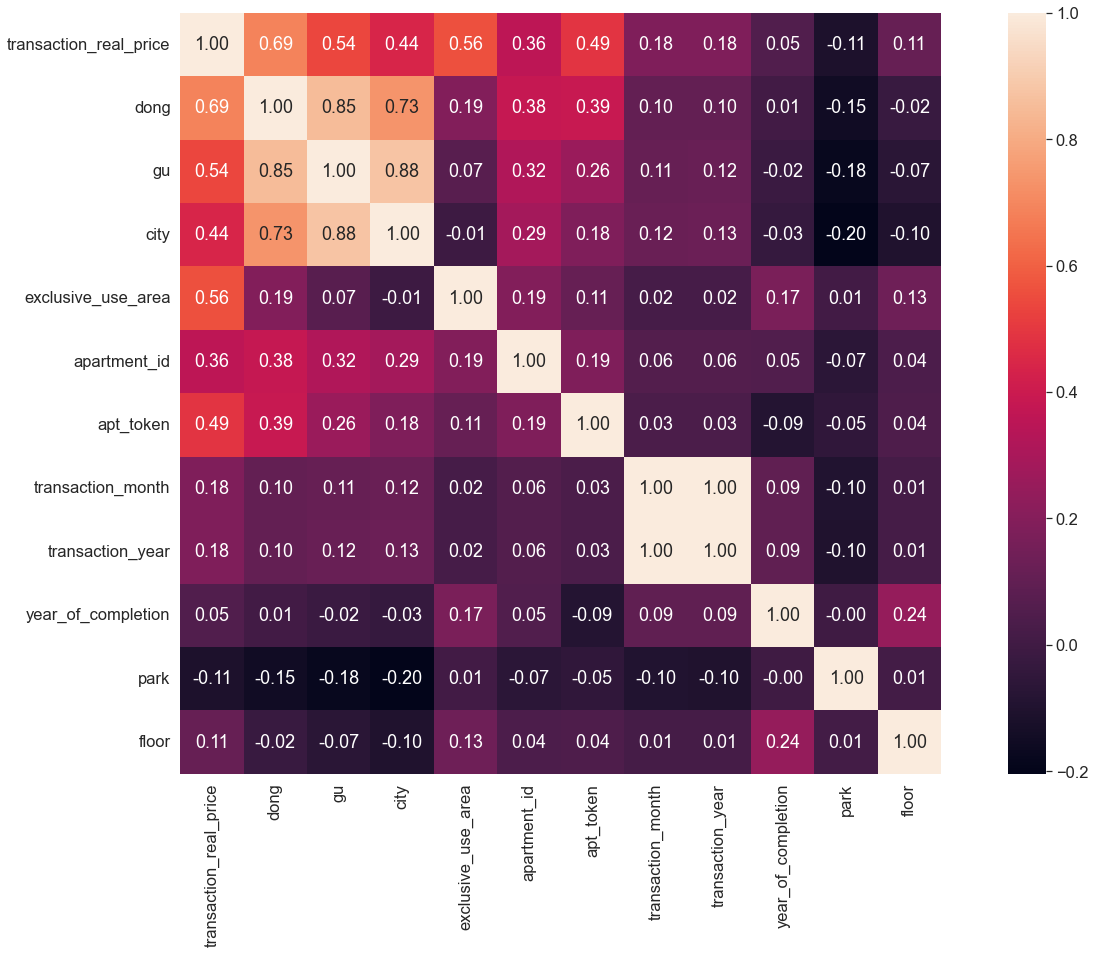

In [76]:
k = 12
corrmat = abs(train.corr(method='spearman'))

columns = corrmat.nlargest(k, 'transaction_real_price').index

cm = np.corrcoef(train[columns].values.T)

sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize = (24,14))

sns.heatmap(cm, annot = True, square = True, fmt='.2f',
            xticklabels = columns.values, yticklabels = columns.values)

plt.show()

이후에 학습 결과 개선을 위해 참고할 수 있을 것 같다.

## 4. 모델 학습하기

### 4-1. 모델 학습하기

In [77]:
def MSE(a,b):
    mse = ((a-b)**2).mean() # 두 값의 차이의 제곱의 평균
    return mse

# 손실함수 RMSE 함수 정의

def RMSE(a, b):
    mse = MSE(a,b)
    rmse = mse ** 0.5 # mse의 제곱근
    return rmse

def real_rmse(model, train):
    sample = train.sample(frac=0.1, replace=True)
    train, y = sample.drop(['transaction_real_price'], axis=1), sample['transaction_real_price']
    
    y_pred = model.predict(train)
    rmse = RMSE(y, y_pred)
    
    return rmse

손실지표를 불러주는 함수이다.

In [78]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

def sample_split(train, frac=0.1):
    sample = train.sample(frac=frac, replace=True, random_state=42)
    train, y = sample.drop(['transaction_real_price'], axis=1), sample['transaction_real_price']
    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state = 42)
    
    return X_train, X_test, y_train, y_test


def SearchModel(train):
    rmse = {}
    
    X_train, X_test, y_train, y_test = sample_split(train, frac=0.1)
    
    lgboost = LGBMRegressor(random_state=42)
    xgboost = XGBRegressor(random_state=42)
    ran_forest = RandomForestRegressor(random_state=42)
    
    lgboost.fit(X_train, y_train)
    xgboost.fit(X_train, y_train)
    ran_forest.fit(X_train, y_train)

    lgb_pred = lgboost.predict(X_test)
    xgb_pred = xgboost.predict(X_test)
    ran_pred = ran_forest.predict(X_test)

    rmse['lgbm'] = RMSE(y_test, lgb_pred)
    rmse['xgb'] = RMSE(y_test, xgb_pred)
    rmse['rfr'] = RMSE(y_test, ran_pred)

    return rmse

SearchModel(train)

{'lgbm': 6506.758362182547, 'xgb': 5510.483514540508, 'rfr': 5086.133951966217}

학습용 모듈을 불러와놓고 어떤 모델이 적합할지 알려주는 함수를 생성했다.

In [79]:
def GridSearch(model, param, train):
    X_train, X_test, y_train, y_test = sample_split(train, frac=0.1)
    
    grid_model = GridSearchCV(model, param_grid=param, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=5)
    grid_model.fit(X_train, y_train)
    
    params = grid_model.cv_results_['params']
    results = pd.DataFrame(params)
    results['score'] = grid_model.cv_results_['mean_test_score']
    results['RMSE'] = np.sqrt(-1 * results['score'])
    
    return results.sort_values(by='RMSE')

param_grid = {
    'n_estimators': [30, 50, 100],
    'max_depth': [2, 5, 10]
}

model = RandomForestRegressor(random_state=255)

GridSearch(model, param_grid, train).head()

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,max_depth,n_estimators,score,RMSE
8,10,100,-5.041468e+07,7100.329902
7,10,50,-5.062607e+07,7115.200035
6,10,30,-5.112053e+07,7149.862422
5,5,100,-1.307788e+08,11435.854006
4,5,50,-1.315245e+08,11468.412138


GridSearchCV를 이용해 모델에 어떤 파라미터가 적합할지 찾아주는 함수를 생성했다.

### 4-2. 파일 제출하기

In [80]:
def save_submission(score, prediction):
    data_dir = './datathon_A_Team'
    submission_path = join(data_dir, 'submission.csv')
    submission = pd.read_csv(submission_path)
    submission['transaction_real_price'] = prediction
    submission_csv_path = '{}/submission_RMSE_{}.csv'.format(data_dir, score)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))


model = XGBRegressor(
    random_state=42,
    learning_rate=0.2,
    n_estimators=150,
    max_depth=10,
#    boosting_type='dart',
#    num_leaves=15,
)

X_train = train.sample(frac=0.1, replace=True, random_state=42)

X_train, y = X_train.drop(['transaction_real_price'], axis=1), X_train['transaction_real_price']
model.fit(X_train, y)
y_pred = model.predict(X_train)
prediction = model.predict(test)

rmse = RMSE(y, y_pred)
print(f'REAL_RMSE : {real_rmse(model, train)}')

save_submission(rmse, prediction)

REAL_RMSE : 4605.492051263028
./datathon_A_Team/submission_RMSE_2105.9627816449993.csv saved!


제출용 파일을 불러오고 생성하는 함수를 만들어 모델을 마치고 바로 파일을 제출할 준비를 끝냈다.

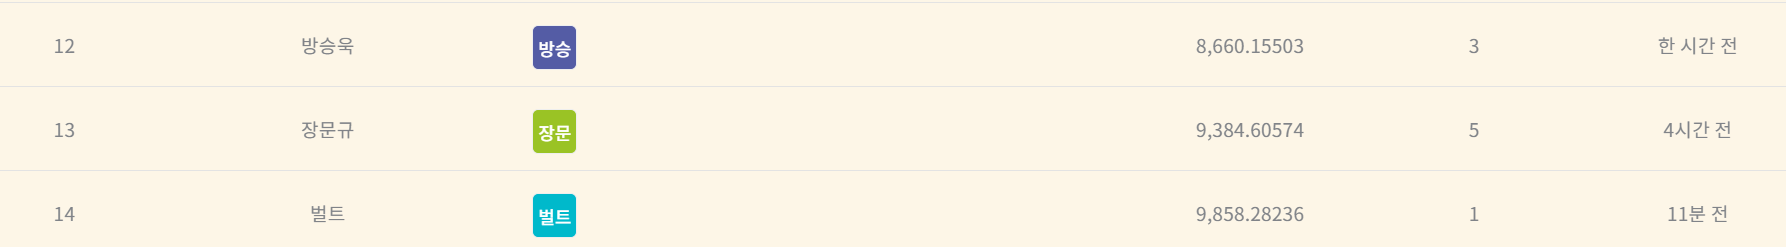

제출 결과 방승욱 팀원님이 8660점으로 12등을 기록했다.

In [82]:
prediction * 1.07

array([30556.17 , 17882.947, 17017.941, ..., 62498.86 , 42084.176,
       26900.916], dtype=float32)

In [84]:
save_submission(1, prediction * 1.07)

./datathon_A_Team/submission_RMSE_1.csv saved!
